# CIDS Carpentries Workshop - Day 1 - Part 7
# Making Plots with plotnine
This lesson is adapted from the Data Carpentries [Data Analysis and Visualization in Python for Ecologists](https://datacarpentry.org/python-ecology-lesson/index.html) lesson.

---
## How to use a Jupyter Notebook
Online Resources:
- https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html
- https://code.visualstudio.com/docs/datascience/jupyter-notebooks 

Useful Tips:
- To save the notebook/file, <kbd>Ctrl</kbd> + <kbd>s</kbd> or Go to `File -> Save`.
- You run a cell with <kbd>Shift</kbd> + <kbd>Enter</kbd> or
    - **Jupyter Notebook, JupyterLab**: you can use the run button ▶ in the tool bar.
    - **VScode**: you can use the run button ▶ in front of the cell.
- If you run a cell with <kbd>Option (Alt)</kbd> + <kbd>Enter</kbd> it will also create a new cell below.
- If you opened this a classic notebook you can check *Help > Keyboard Shortcuts* else see the *Cheatsheet* for more info.
- If you are using VScode, See [Jupyter Notebooks in VS Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) for more info.
- The notebook has different type of cells (Code and Markdown are most commonly used): 
    - **Code** cells expect code for the Kernel you have chosen, syntax highlighting is available, comments in the code are specified with `#` -> code after this will not be executed.
    - **Markdown** cells allow you to right report style text, using markdown for formatting the style (e.g. Headers, bold face etc).
---

## ❓Questions and Objectives for this Notebook
What should you be able to answer by the end of this notebook?

### Questions

 - How can I visualise data in Python?
 - What is 'grammar of graphics'?

### Objectives

- Create a plotnine object.
- Set universal plot settings.
- Modify an existing plotnine object.
- Change the aesthetics of a plot such as color.
- Edit the axis labels.
- Build complex plots using a step-by-step approach.
- Create scatter plots, box plots and time series plots.
- Use the facet_wrap and facet_grid commands to create a collection of plots splitting the data by a factor variable.
- Create customised plot styles to meet their needs.


Python has powerful built-in plotting capabilities such as matplotlib, but for this episode, we will be using the plotnine package, which facilitates the creation of highly-informative plots of structured data based on the R implementation of ggplot2 and The Grammar of Graphics by Leland Wilkinson. The plotnine package is built on top of Matplotlib and interacts well with Pandas.

Just as with the other packages, plotnine needs to be imported. It is good practice to not just load an entire package such as from plotnine import *, but to use an abbreviation as we used pd for Pandas:

In [1]:
# Import plotnine
%matplotlib inline
import plotnine as p9

# Loading in the data
import pandas as pd

surveys_complete = pd.read_csv('../data/surveys.csv')
surveys_complete = surveys_complete.dropna()

---
## Plotting with plotnine
The plotnine package (cfr. other packages conform The Grammar of Graphics) supports the creation of complex plots from data in a dataframe. It uses default settings, which help creating publication quality plots with a minimal amount of settings and tweaking.

plotnine graphics are built step by step by adding new elements adding different elements on top of each other using the + operator. Putting the individual steps together in brackets () provides Python-compatible syntax.

To build a plotnine graphic we need to:
1. Bind the plot to a specific data frame using the data argument

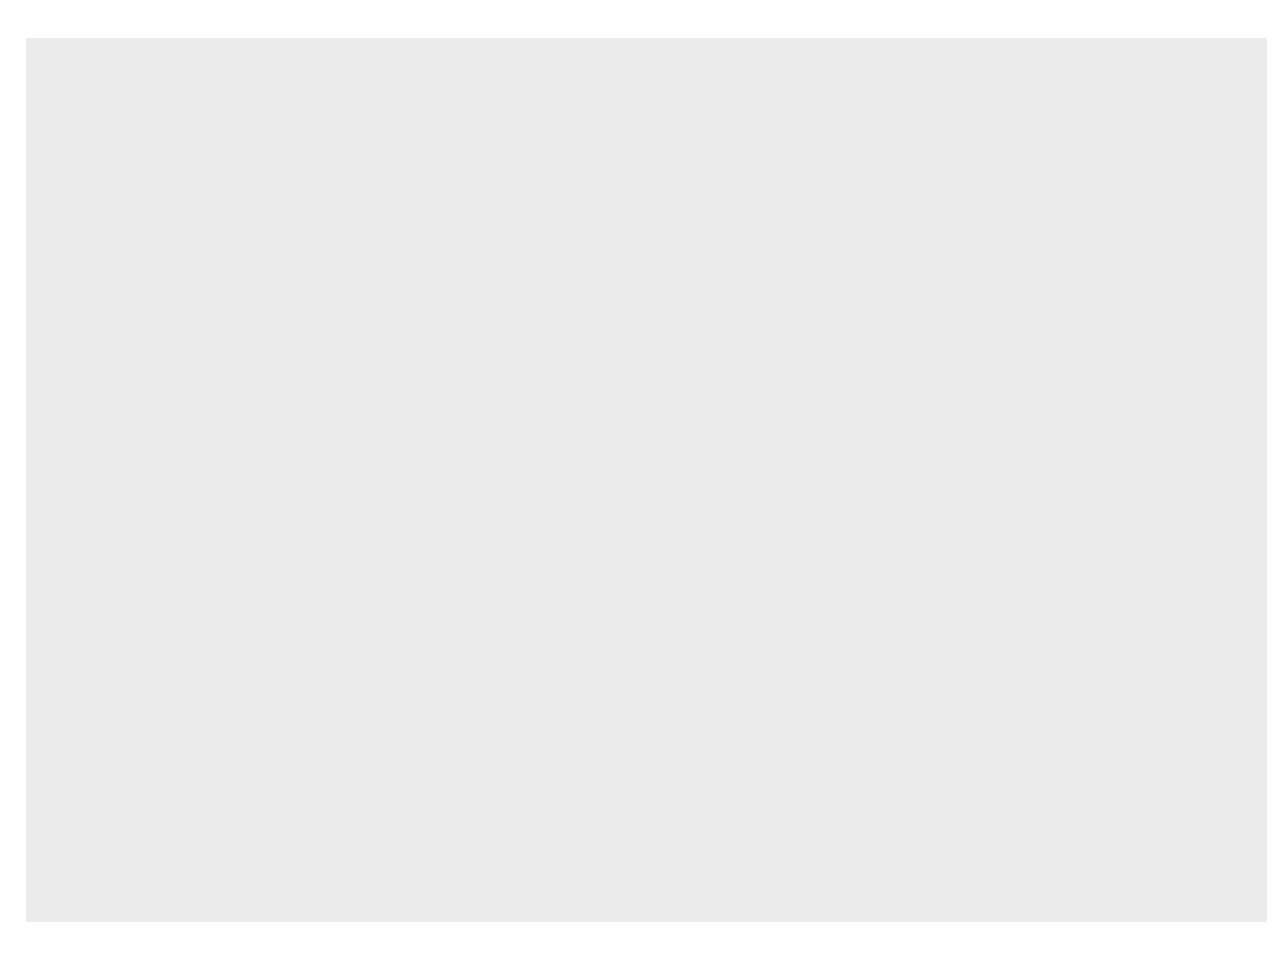

<Figure Size: (640 x 480)>

In [2]:
(p9.ggplot(data=surveys_complete))

As we have not defined anything else, just an empty figure is available and presented.

2. Define aesthetics (aes), by selecting variables used in the plot and mapping them to a presentation such as plotting size, shape, color, etc.

    (The most important aes mappings are: x, y, alpha, color, colour, fill, linetype, shape, size and stroke.)

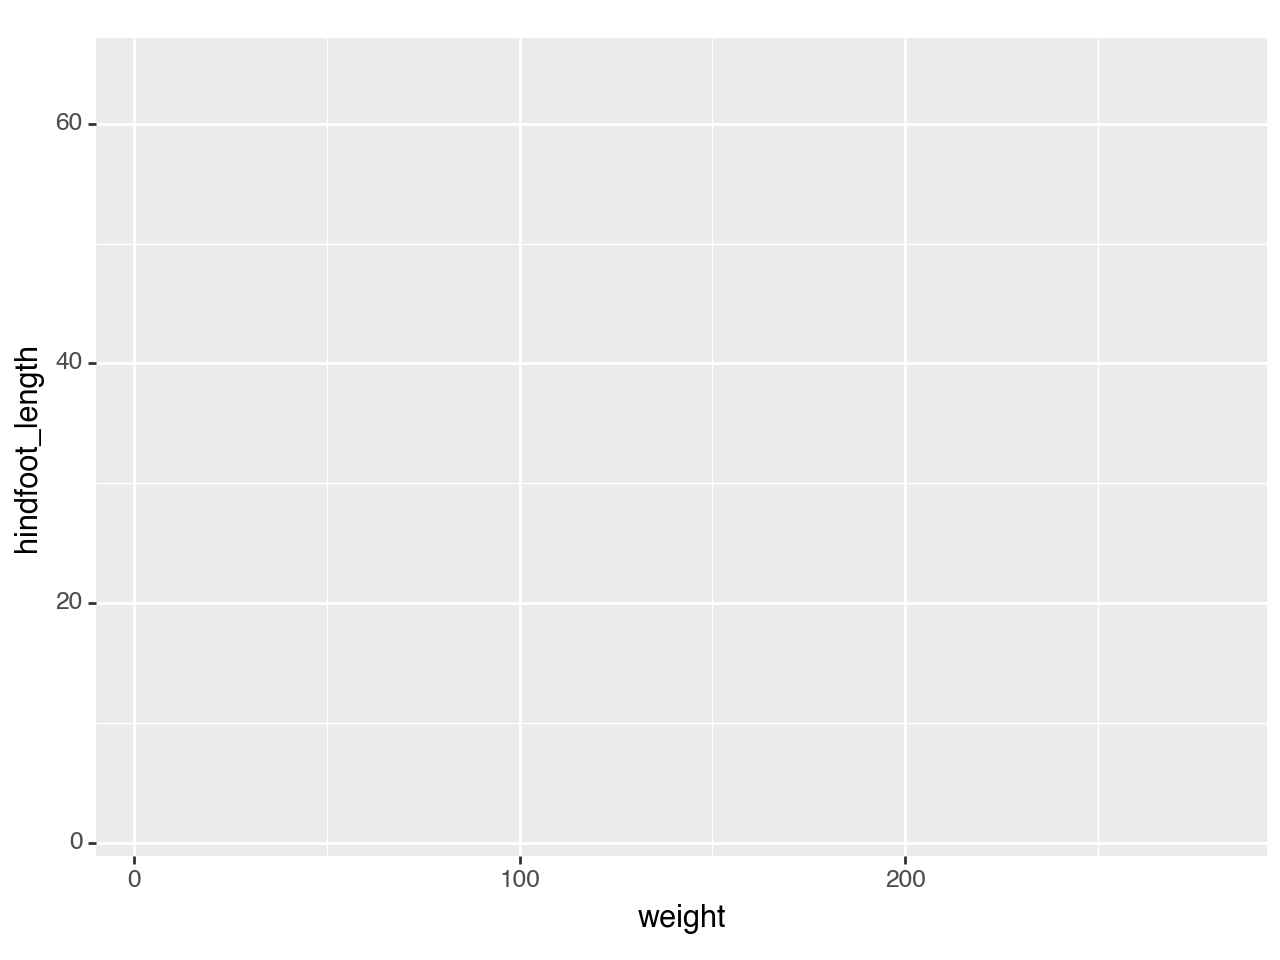

<Figure Size: (640 x 480)>

In [3]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length')))


3. Define what kind of geometry will be used for the plot. The most straightforward is probably using points. Others are lines, bars,… To add a geom to the plot use + operator:


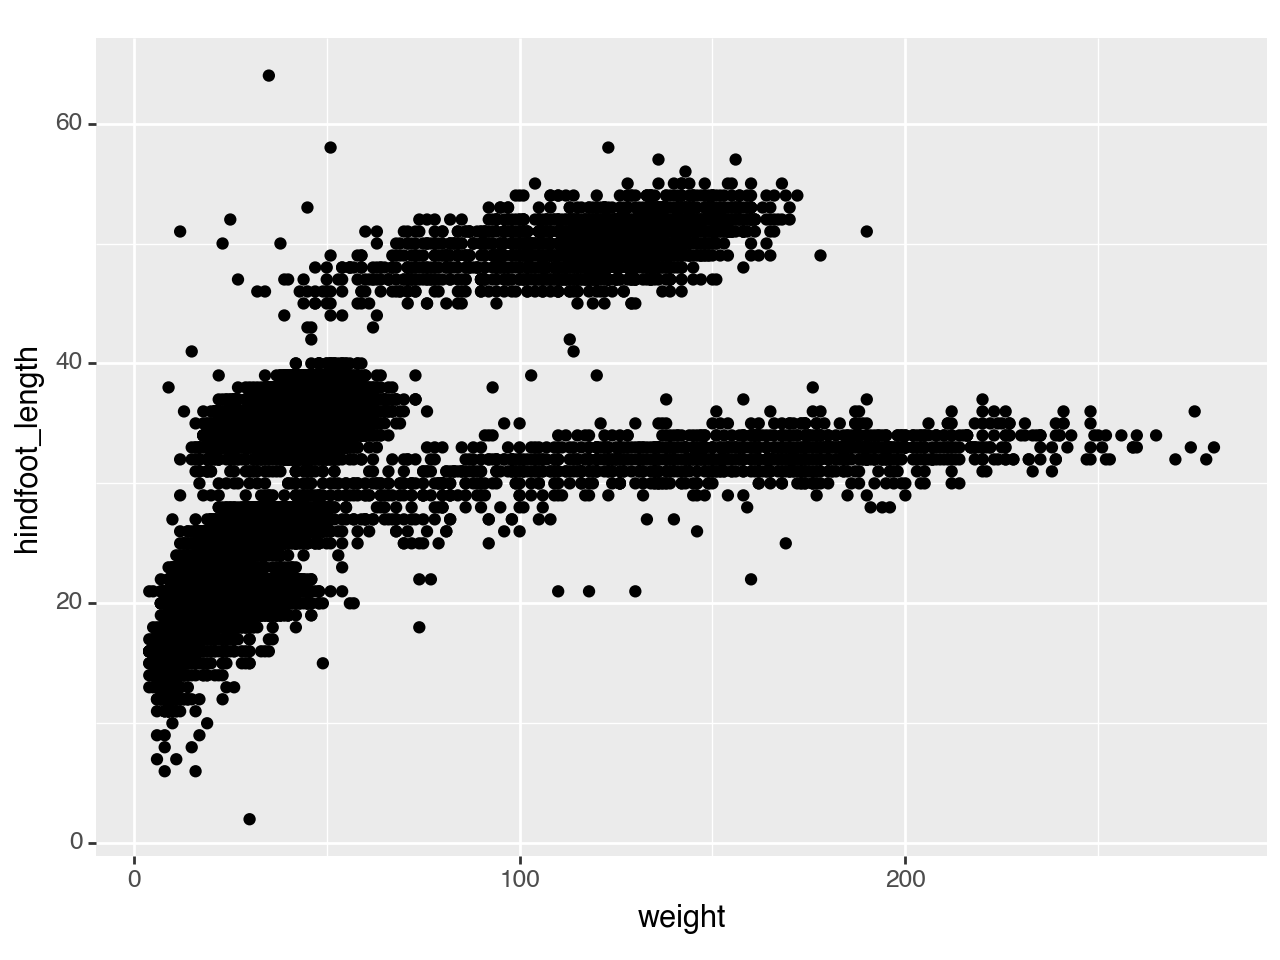

<Figure Size: (640 x 480)>

In [5]:
# The + in the plotnine package is particularly useful because it allows you to modify existing plotnine objects.

# Create plotnine object
surveys_plot = p9.ggplot(data=surveys_complete,
                         mapping=p9.aes(x='weight', y='hindfoot_length'))

# Draw the plotnine object
surveys_plot + p9.geom_point()

## ✏️ Challenge - Bar Chart
Working on the surveys_complete data set, use the plot-id column to create a bar-plot that counts the number of records for each plot. (Check the documentation of the bar geometry to handle the counts)

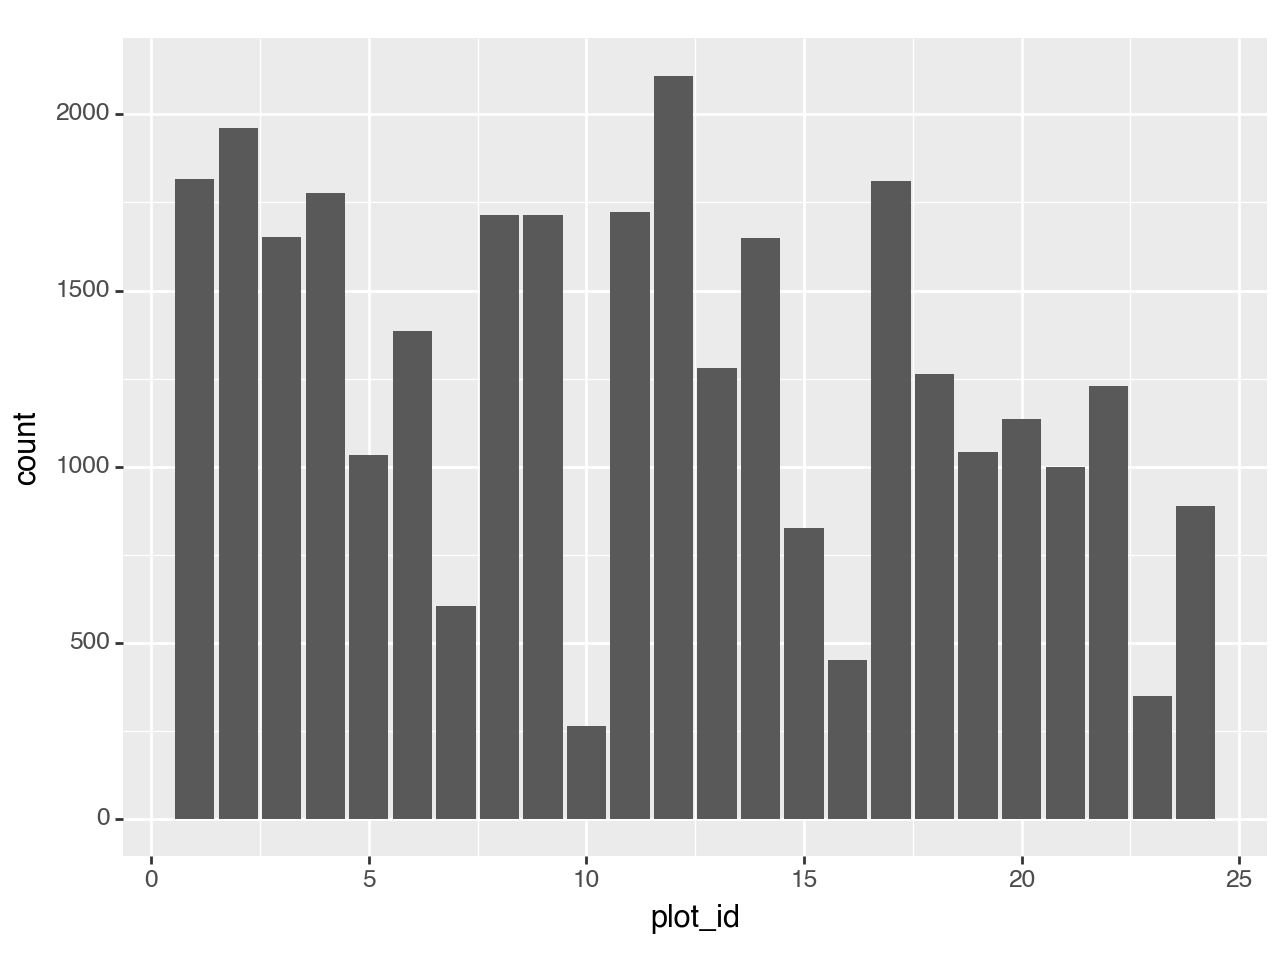

<Figure Size: (640 x 480)>

In [6]:
# Bar Plot of "plot_id" vs counts
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id'))
    + p9.geom_bar()
)

---
## Building your plots iteratively

Building plots with plotnine is typically an iterative process. We start by defining the dataset we’ll use, lay the axes, and choose a geom. Hence, the data, aes and geom-* are the elementary elements of any graph:

In [ ]:
# Basic Scatter Plot
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)

Then, we start modifying this plot to extract more information from it. For instance, we can add transparency (alpha) to avoid overplotting:

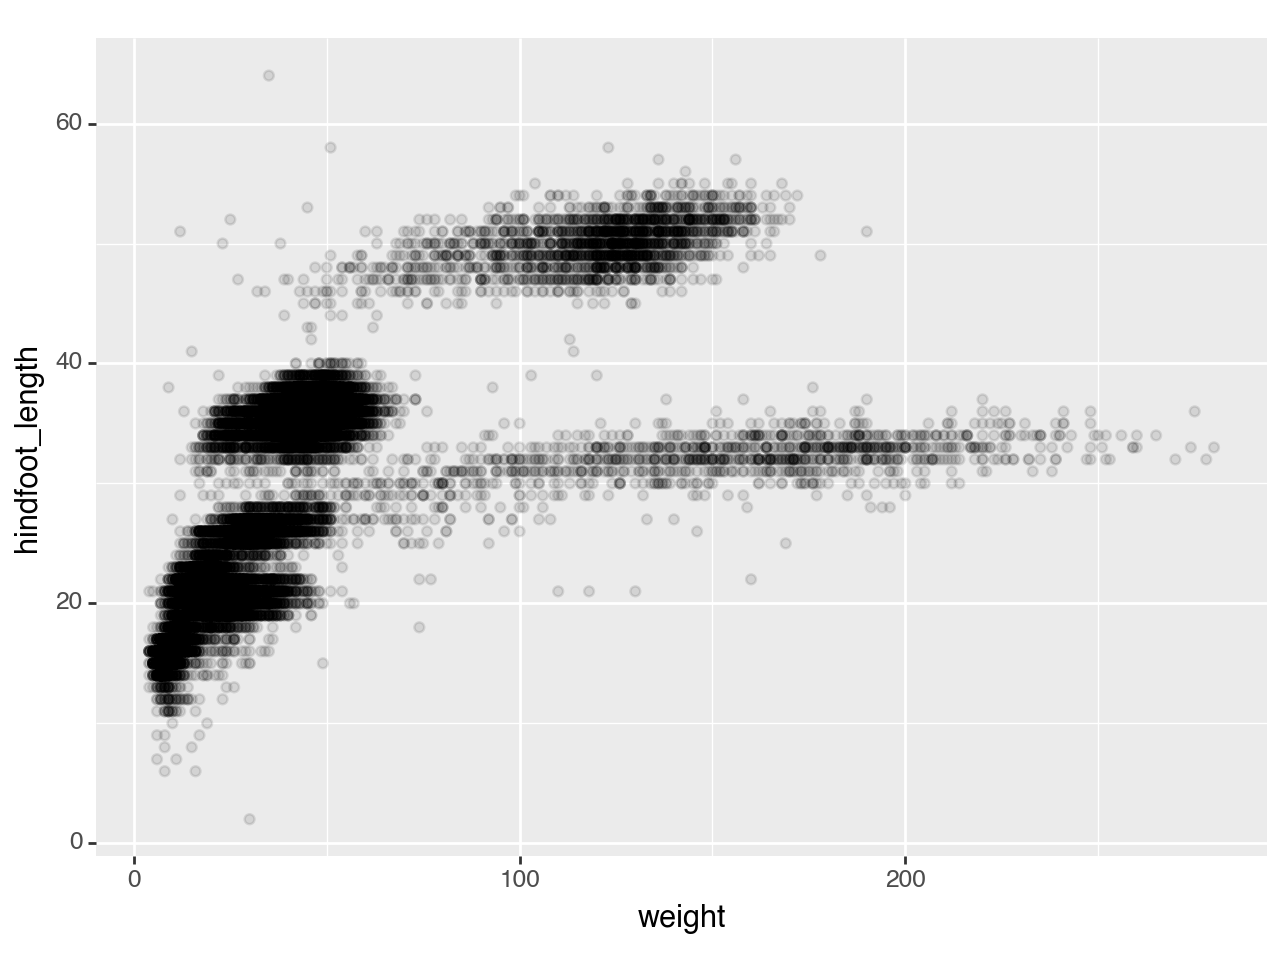

<Figure Size: (640 x 480)>

In [7]:
# Adding Transparency
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(alpha=0.1)
)

We can also add colors for all the points.

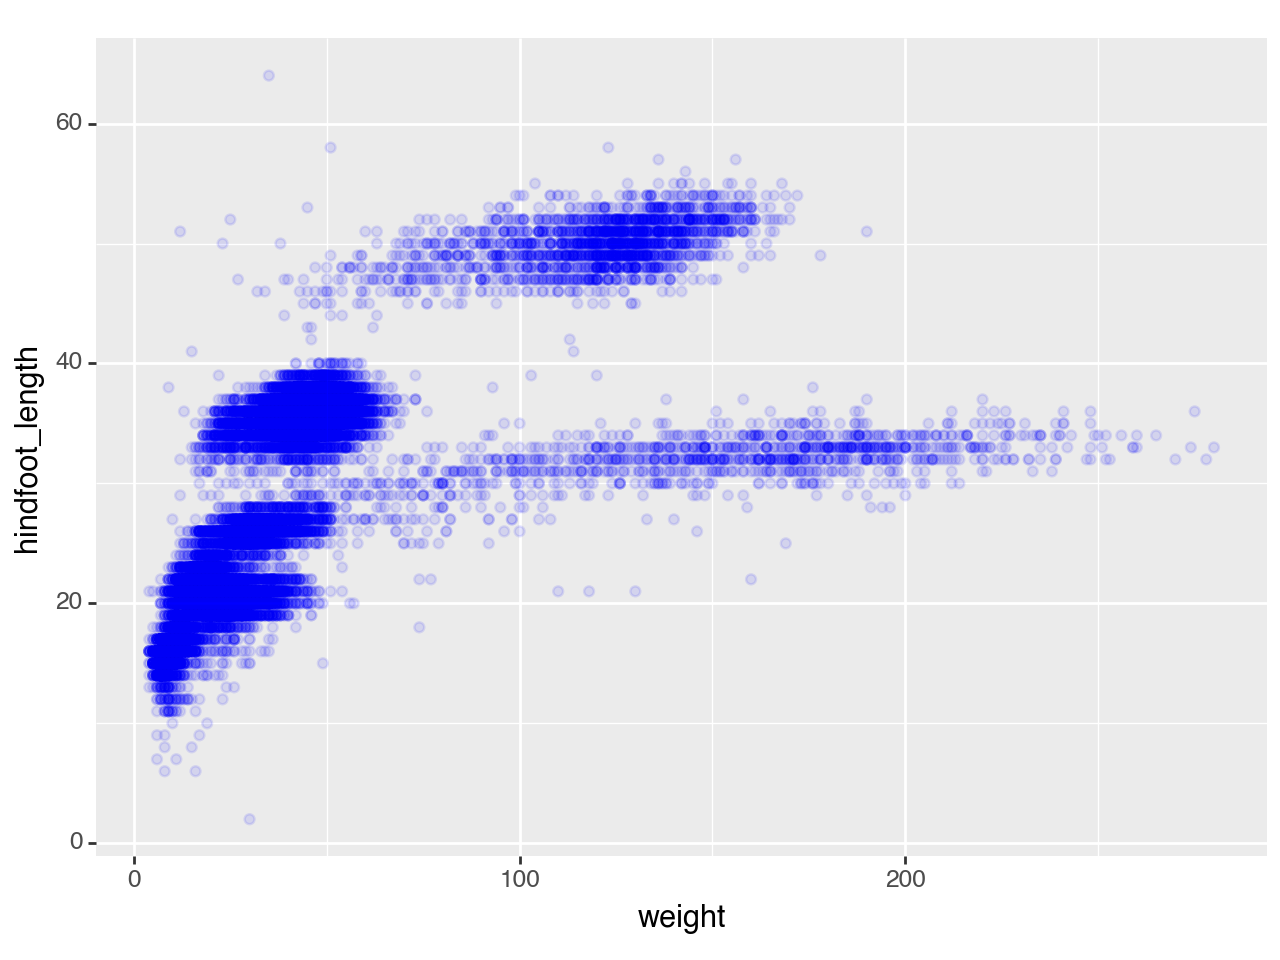

<Figure Size: (640 x 480)>

In [8]:
# Adding Color
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(alpha=0.1, color='blue')
)

Or to color each species in the plot differently, map the species_id column to the color aesthetic:

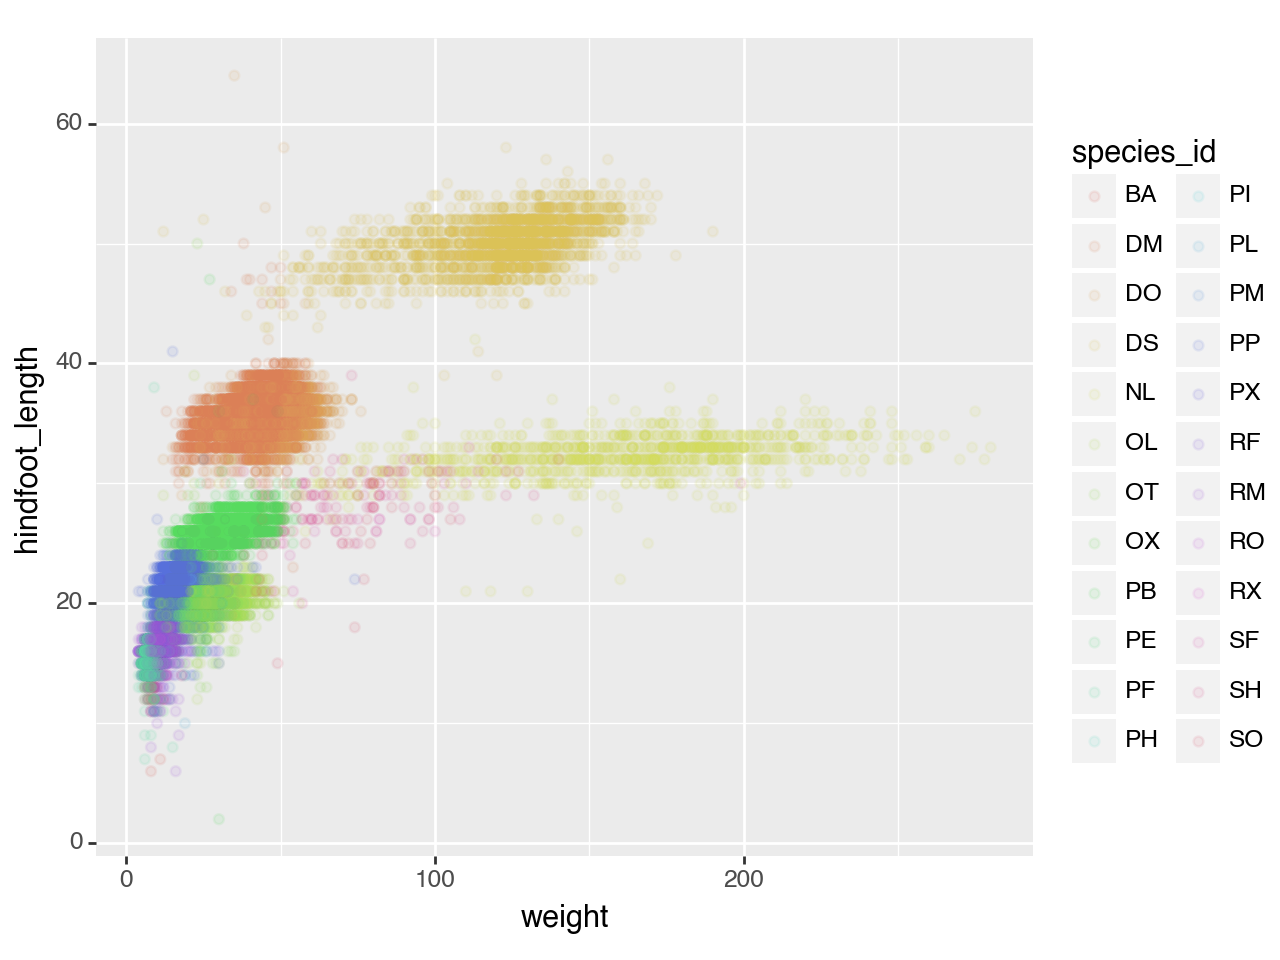

<Figure Size: (640 x 480)>

In [9]:
# Coloring by "species_id"
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
)

Apart from the adaptations of the arguments and settings of the data, aes and geom-* elements, additional elements can be added as well, using the + operator:

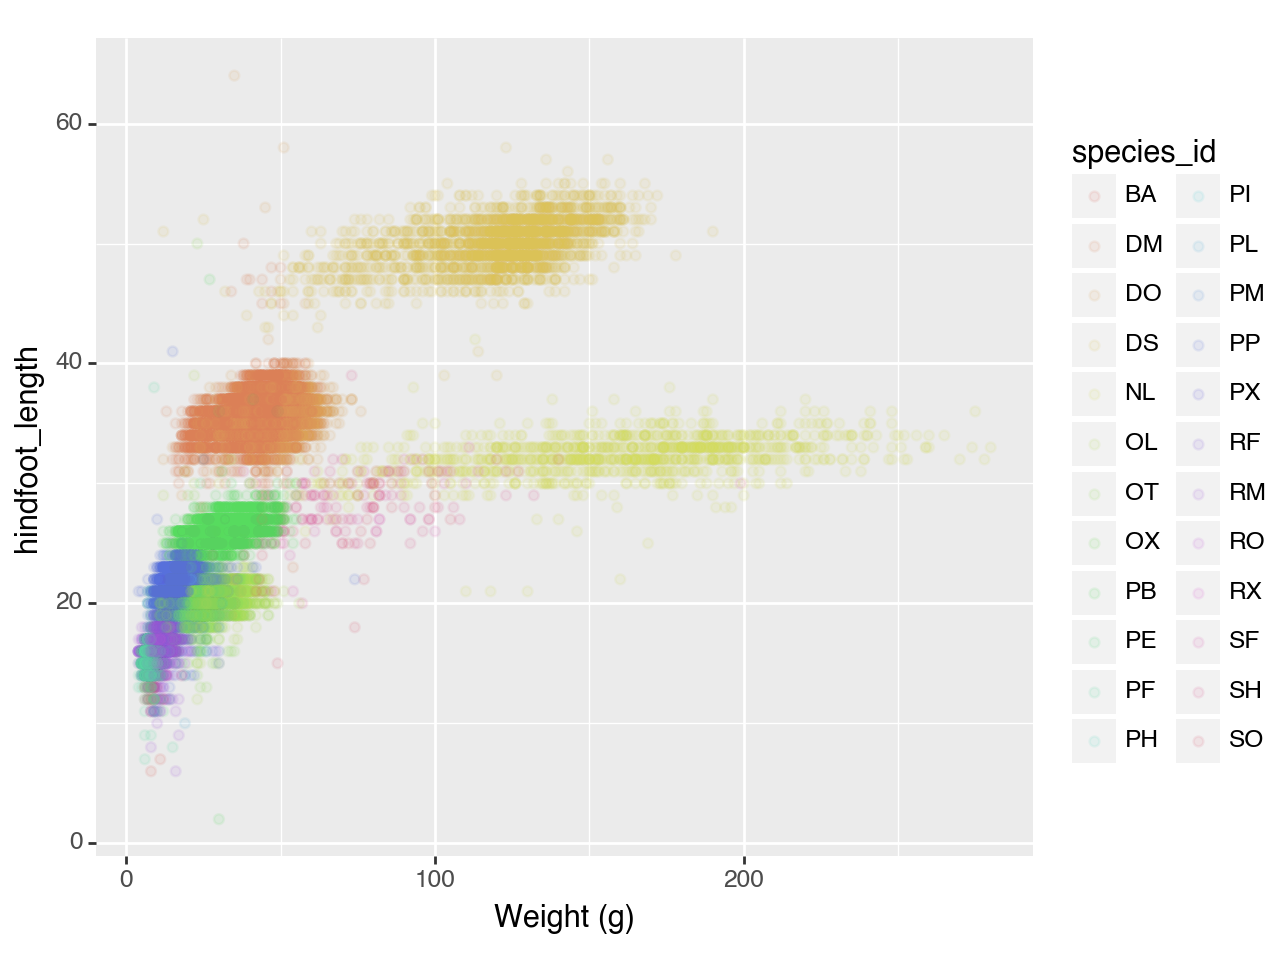

<Figure Size: (640 x 480)>

In [10]:
# Changing the Labels
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
)

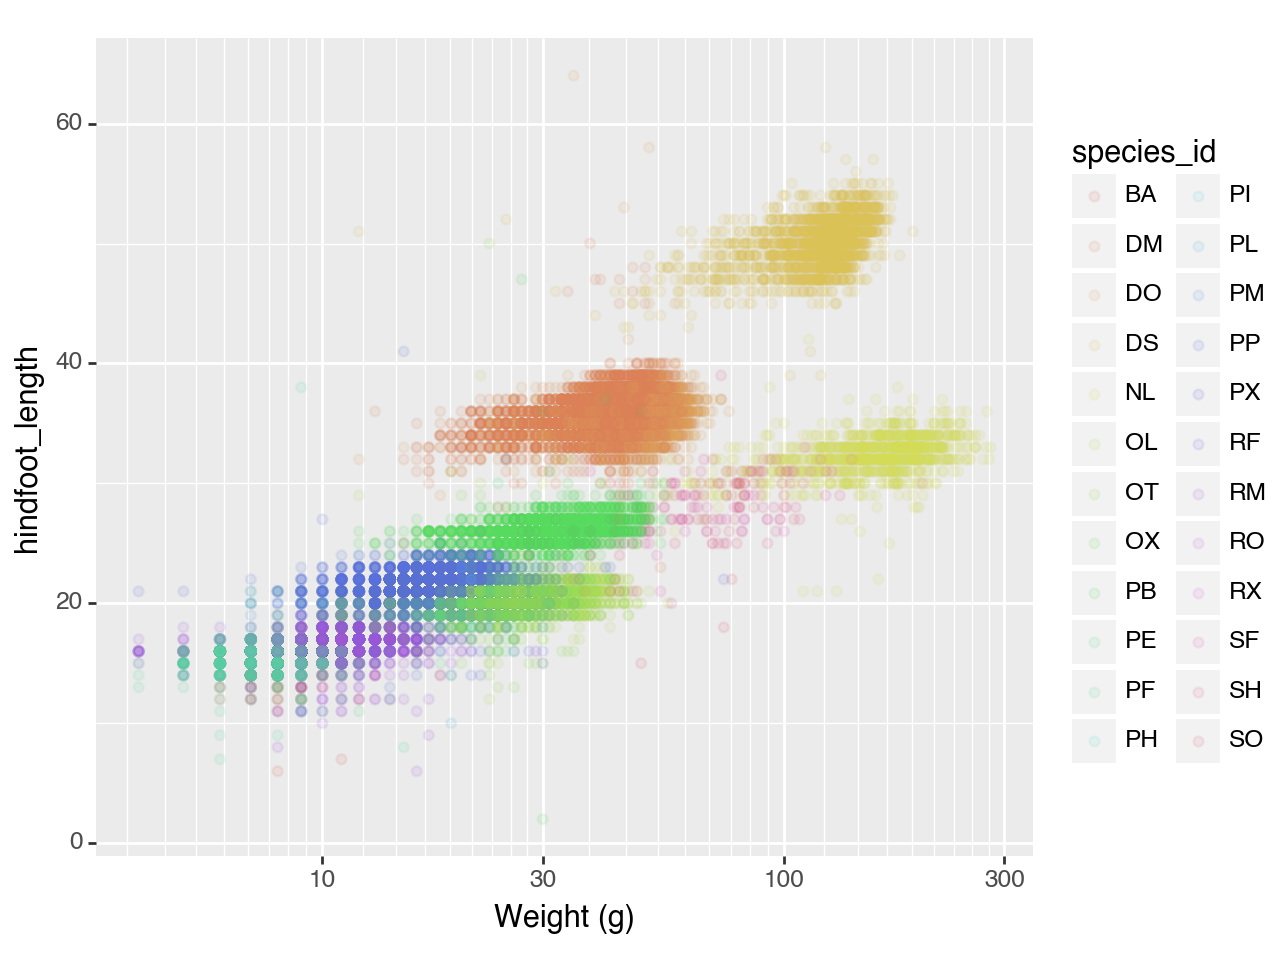

<Figure Size: (640 x 480)>

In [11]:
# Defining scale for colors, axes,… 
# For example, a log-version of the x-axis could support the interpretation of the lower numbers:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
    + p9.scale_x_log10()
)

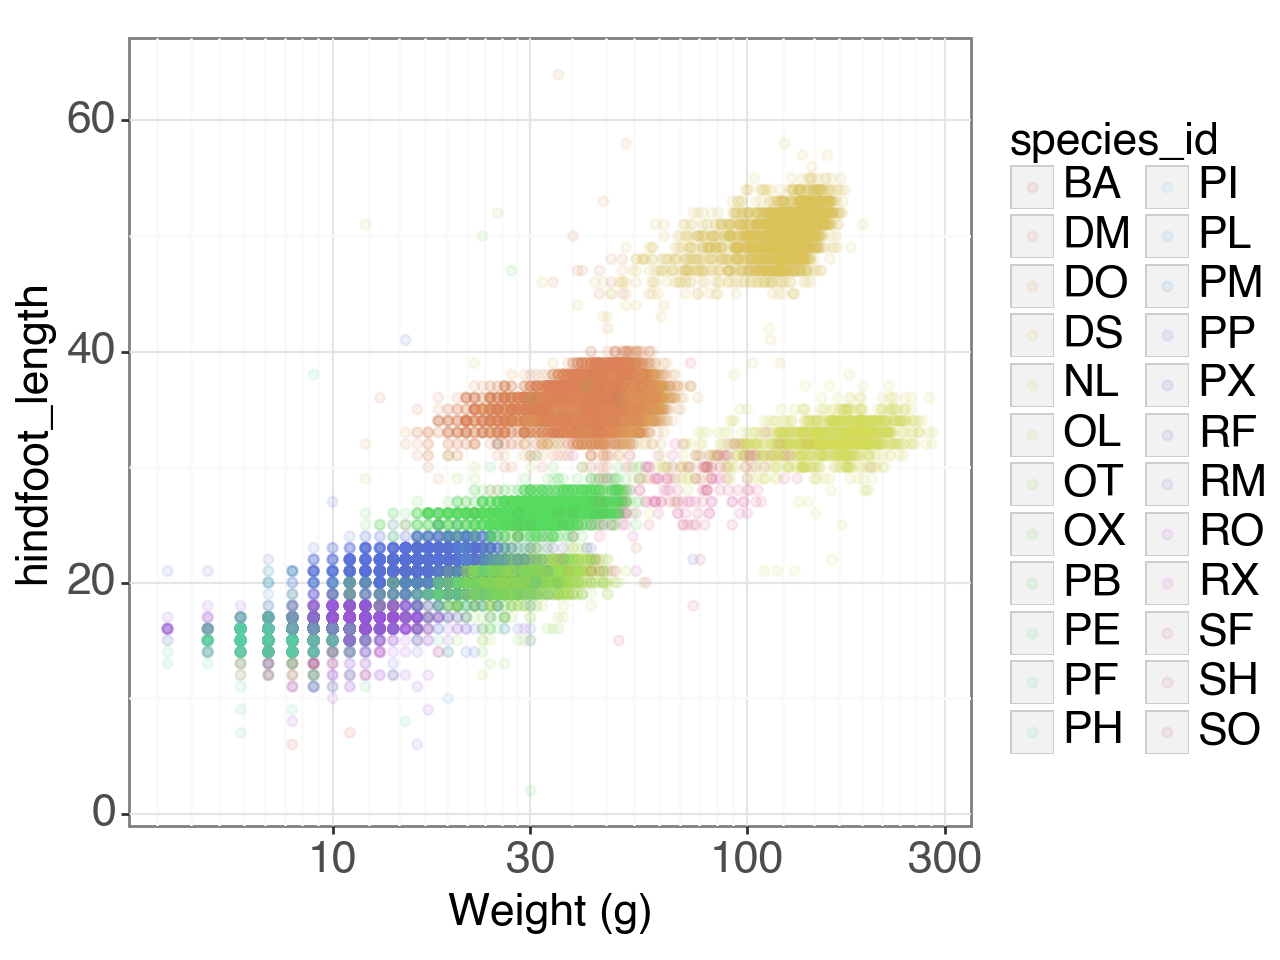

<Figure Size: (640 x 480)>

In [12]:
# Changing the theme (theme_*) or some specific theming (theme) elements. 
# Usually plots with white background look more readable when printed. 
# We can set the background to white using the function theme_bw().
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
    + p9.scale_x_log10()
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16))
)

## ✏️ Challenge - Bar Plot Adaptations
Adapt the bar plot of the previous exercise by mapping the sex variable to the color fill of the bar chart. 

Change the scale of the color fill by providing the colors blue and orange manually.

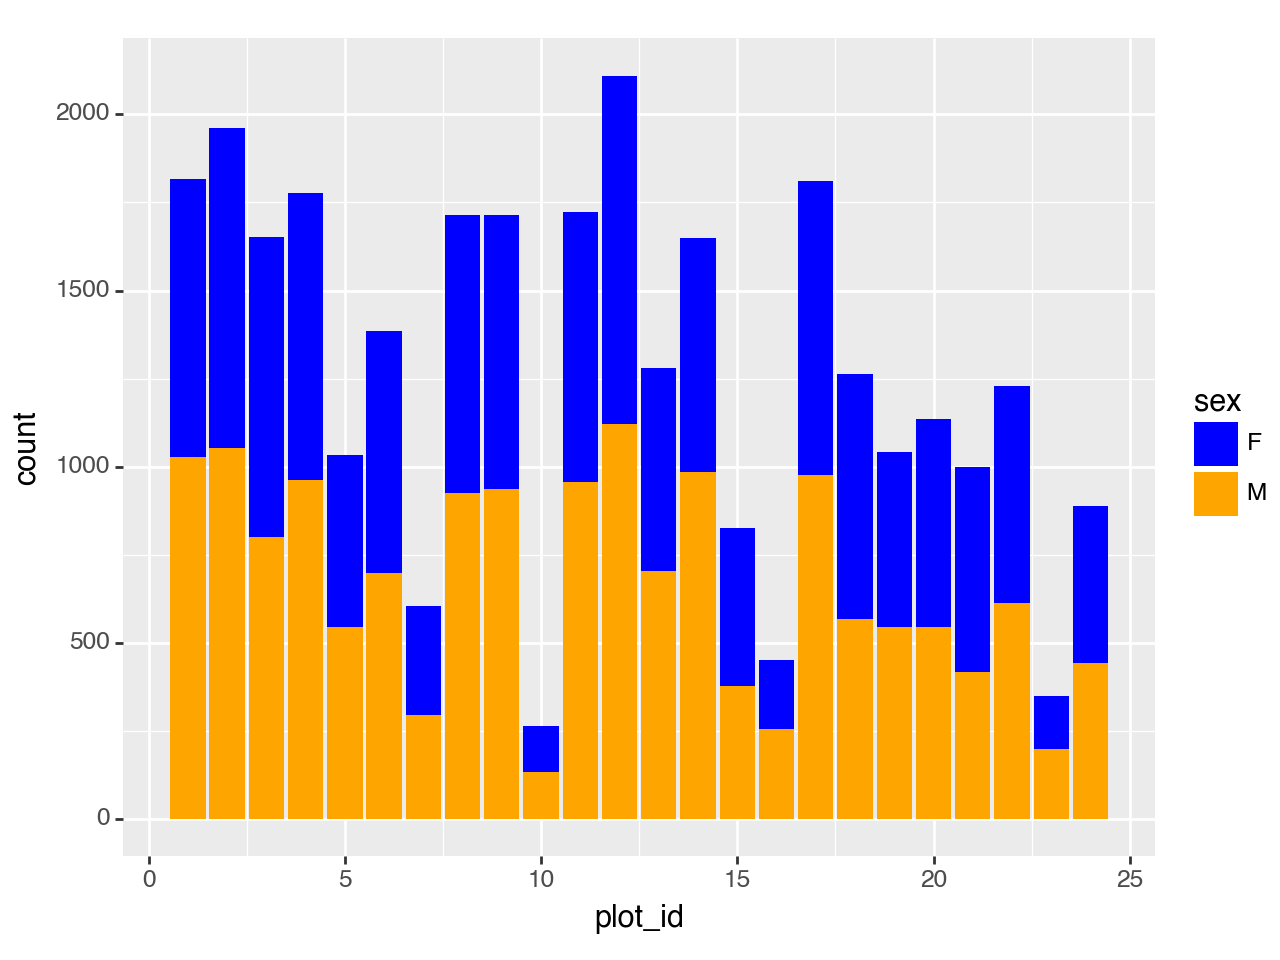

<Figure Size: (640 x 480)>

In [13]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id',
                          fill='sex'))
    + p9.geom_bar()
    + p9.scale_fill_manual(["blue", "orange"])
)

---
## Plotting Distributions

Visualizing distributions is a common task during data exploration and analysis. To visualize the distribution of weight within each species_id group, a boxplot can be used:

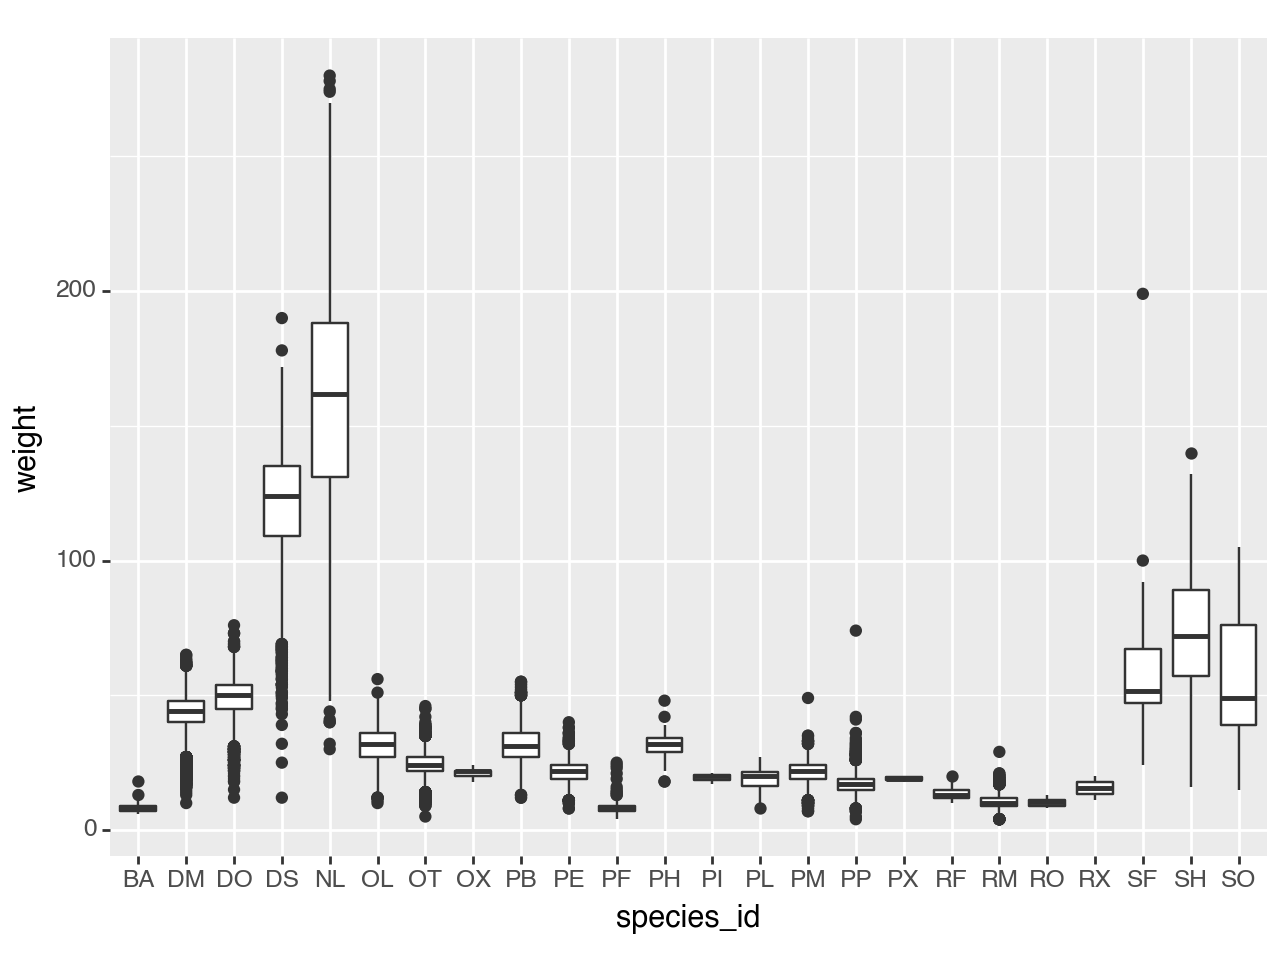

<Figure Size: (640 x 480)>

In [14]:
# Box Plot of "species_id" vs. "weight"
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_boxplot()
)

By adding points of the individual observations to the boxplot, we can have a better idea of the number of measurements and of their distribution:

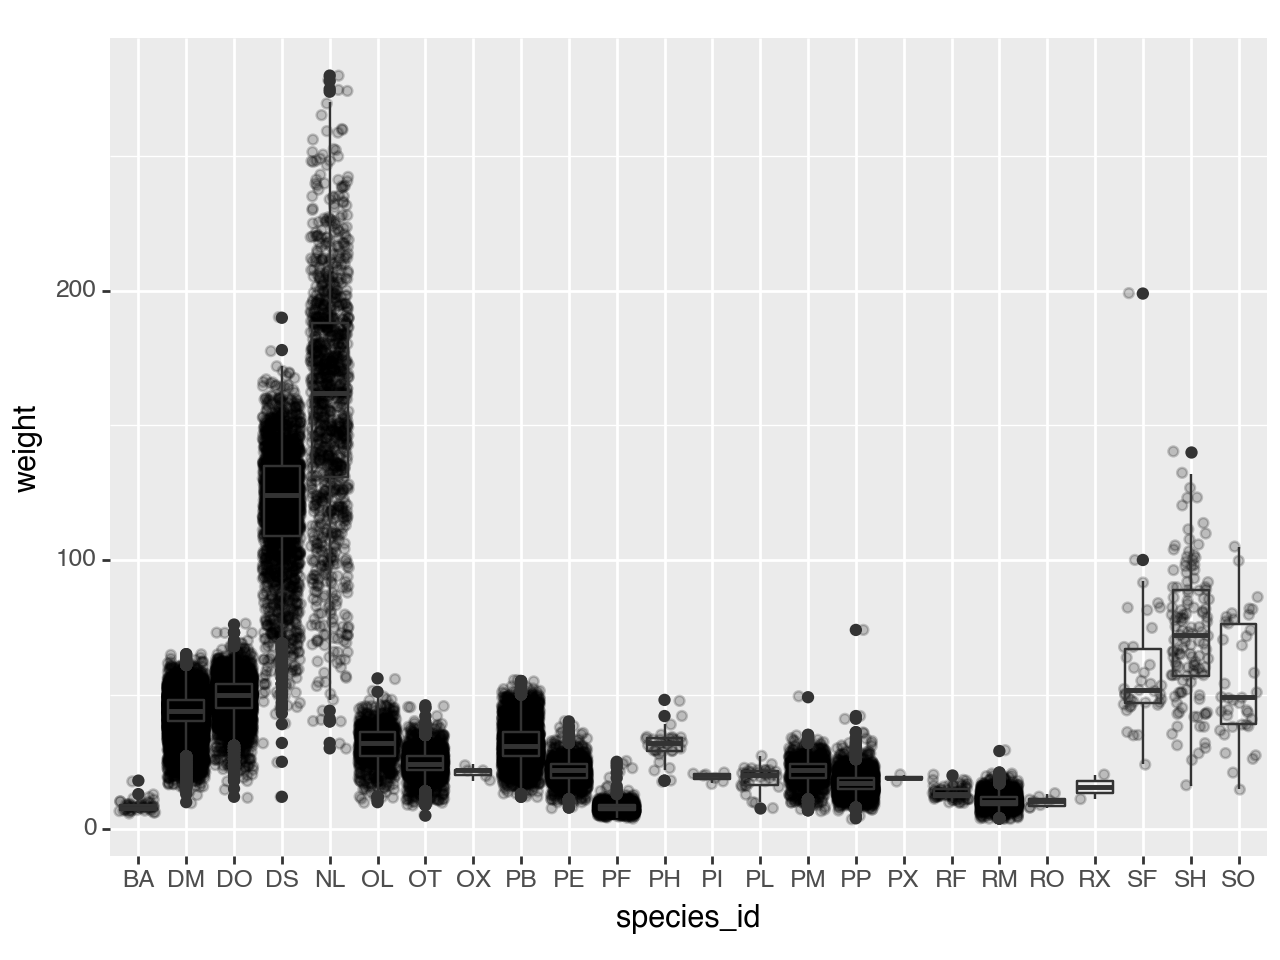

<Figure Size: (640 x 480)>

In [15]:
# Adding geom_jitter() to the plot to show the individual data points.
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
)

## ✏️ Challenge - Distributions
Boxplots are useful summaries, but hide the shape of the distribution. For example, if there is a bimodal distribution, this would not be observed with a boxplot. An alternative to the boxplot is the violin plot (sometimes known as a beanplot), where the shape (of the density of points) is drawn.

In many types of data, it is important to consider the scale of the observations. For example, it may be worth changing the scale of the axis to better distribute the observations in the space of the plot.

- Replace the box plot with a violin plot, see geom_violin()
- Represent weight on the log10 scale, see scale_y_log10()
- Add color to the datapoints on your boxplot according to the plot from which the sample was taken (plot_id)

Hint: Check the class for plot_id. By using factor() within the aes mapping of a variable, plotnine will handle the values as category values.

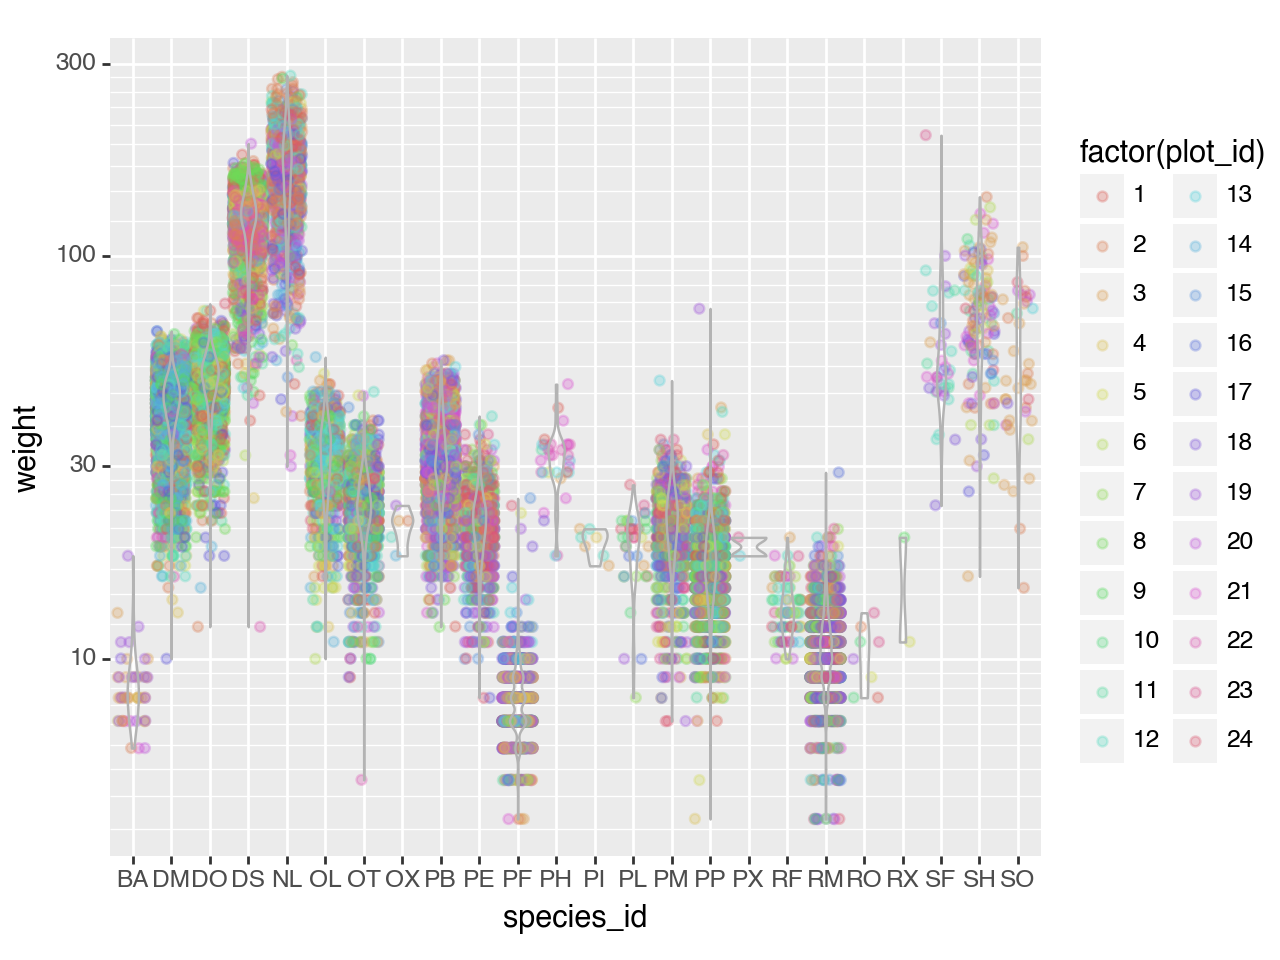

<Figure Size: (640 x 480)>

In [16]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight',
                          color='factor(plot_id)'))
    + p9.geom_jitter(alpha=0.3)
    + p9.geom_violin(alpha=0, color="0.7")
    + p9.scale_y_log10()
)

---
## Plotting Time Series Data
Let’s calculate number of counts per year for each species. To do that we need to group data first and count the species (species_id) within each group.

In [17]:
# Counting the count of species in each year
yearly_counts = surveys_complete.groupby(['year', 'species_id'])['species_id'].count()
yearly_counts

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64

When checking the result of the previous calculation, we actually have both the year and the species_id as a row index. We can reset this index to use both as column variable:

In [18]:
# Resetting the row index
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts

year species_id  counts
0    1977         DM     181
1    1977         DO      12
2    1977         DS      29
3    1977         OL       1
4    1977         OX       2
..    ...        ...     ...
327  2002         PP     375
328  2002         RM      20
329  2002         RO       7
330  2002         SF       5
331  2002         SH       9

[332 rows x 3 columns]

Timelapse data can be visualised as a line plot (geom_line) with years on x axis and counts on the y axis.

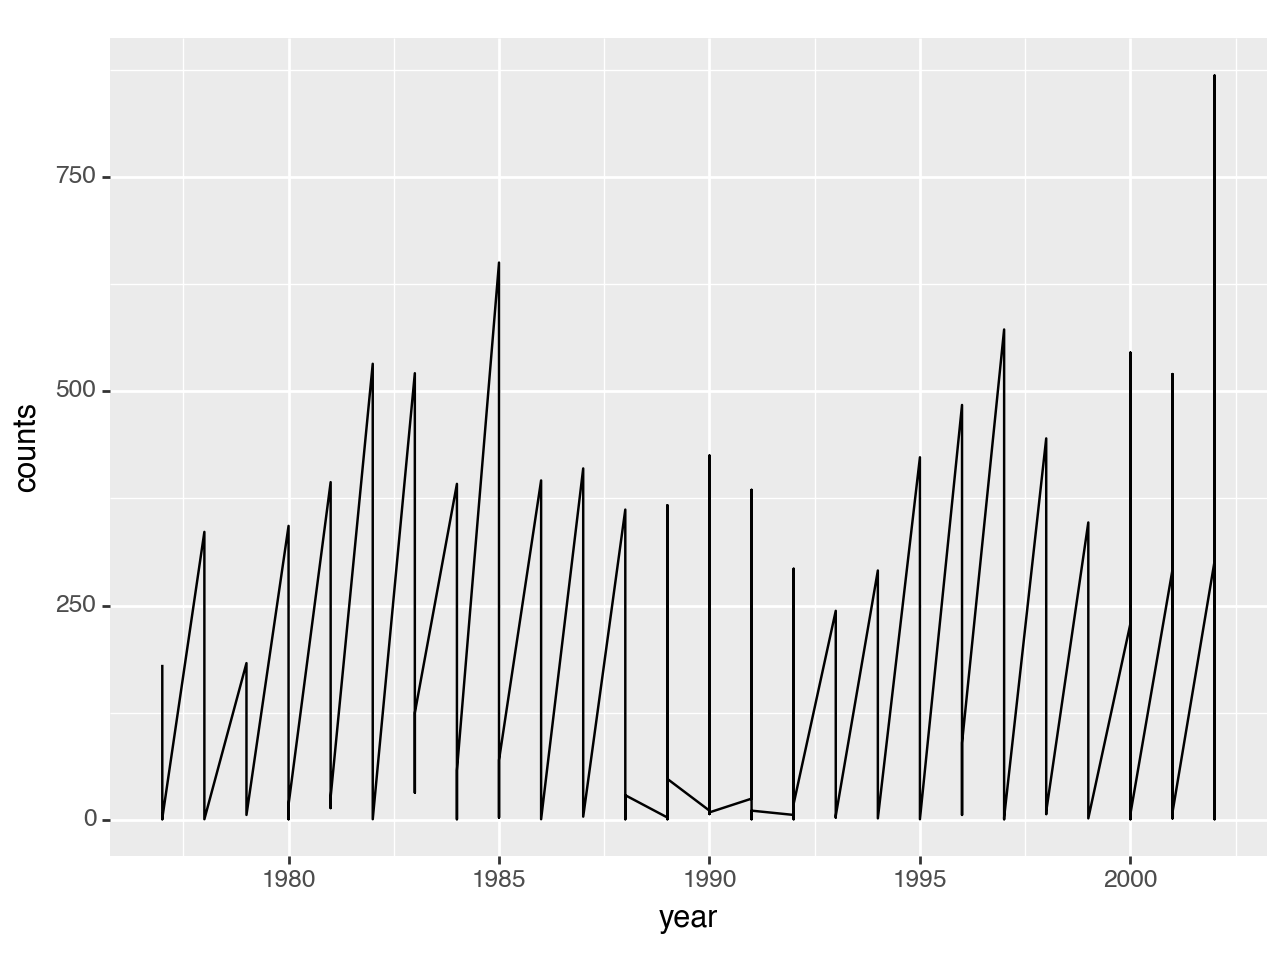

<Figure Size: (640 x 480)>

In [19]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts'))
    + p9.geom_line()
)

Unfortunately this does not work, because we plot data for all the species together. We need to tell plotnine to draw a line for each species by modifying the aesthetic function and map the species_id to the color:

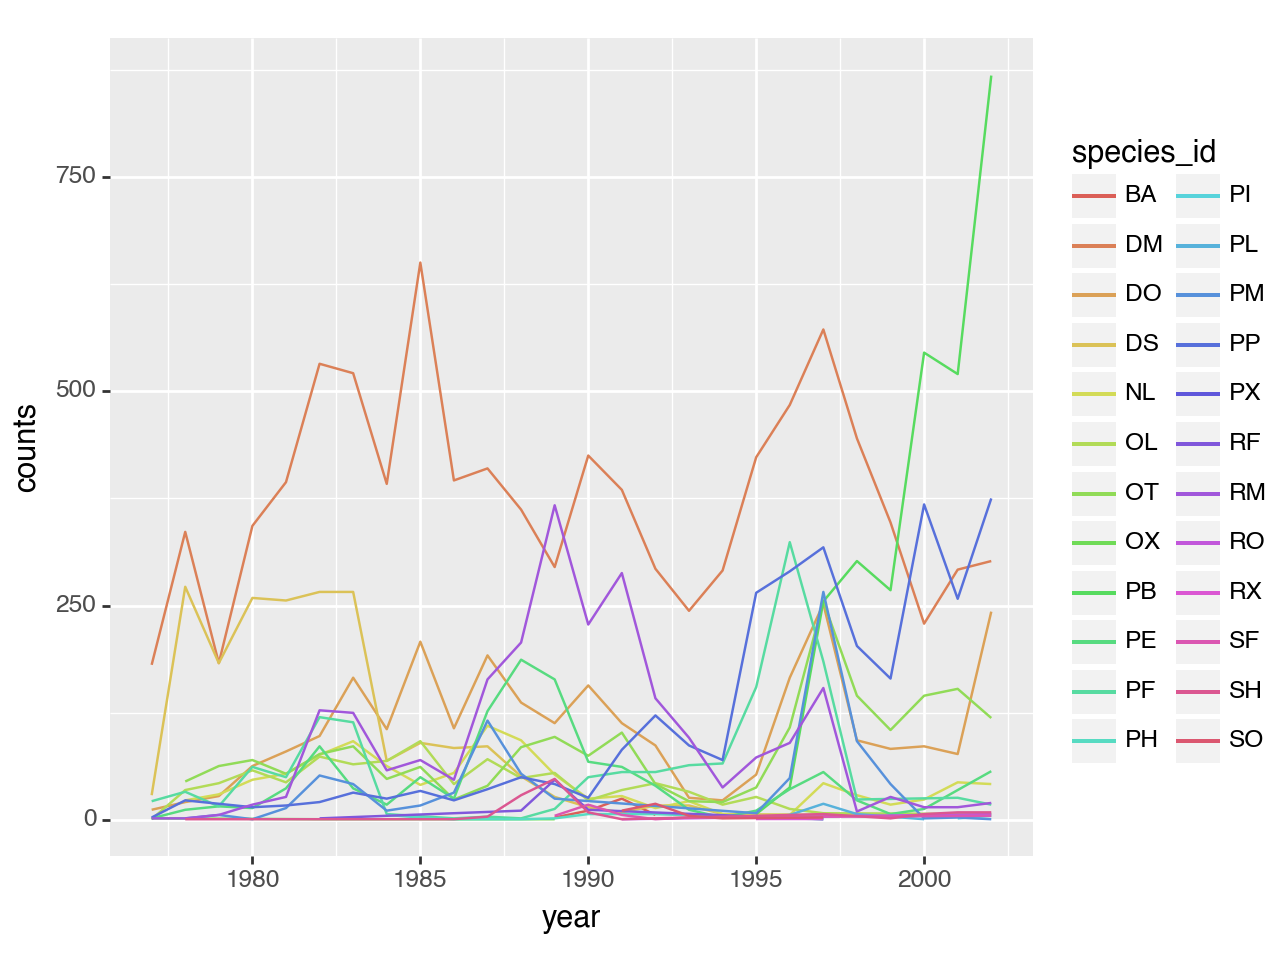

<Figure Size: (640 x 480)>

In [20]:
# Color by "species_id"
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts',
                          color='species_id'))
    + p9.geom_line()
)

---
## Faceting
As any other library supporting the Grammar of Graphics, plotnine has a special technique called faceting that allows to split one plot into multiple plots based on a factor variable included in the dataset.

Consider our scatter plot of the weight versus the hindfoot_length from the previous sections:


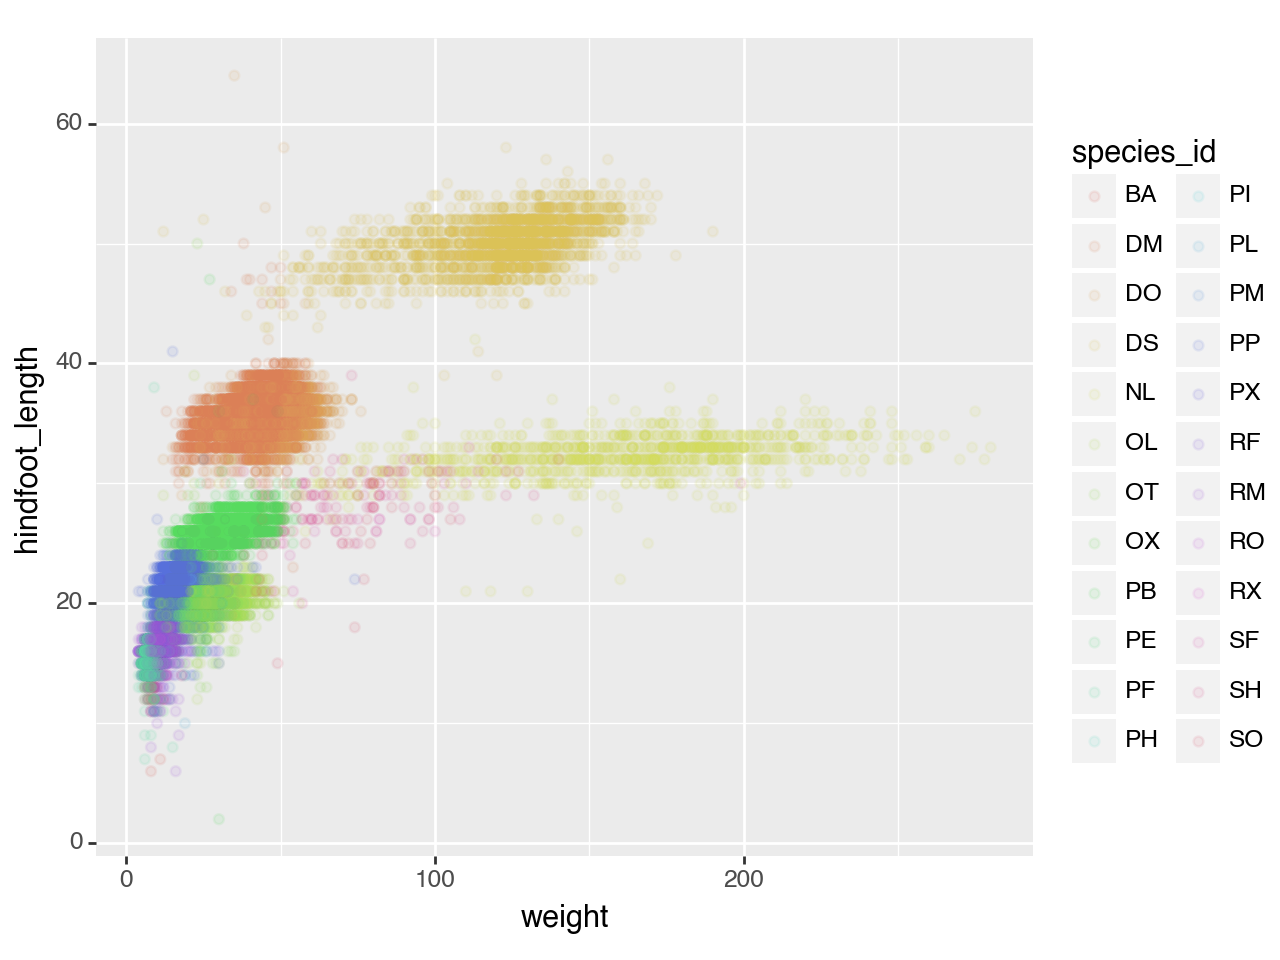

<Figure Size: (640 x 480)>

In [21]:
# Scatter Plot of weight vs. hindfoot_length
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
)

We can now keep the same code and at the facet_wrap on a chosen variable to split out the graph and make a separate graph for each of the groups in that variable. As an example, use sex:

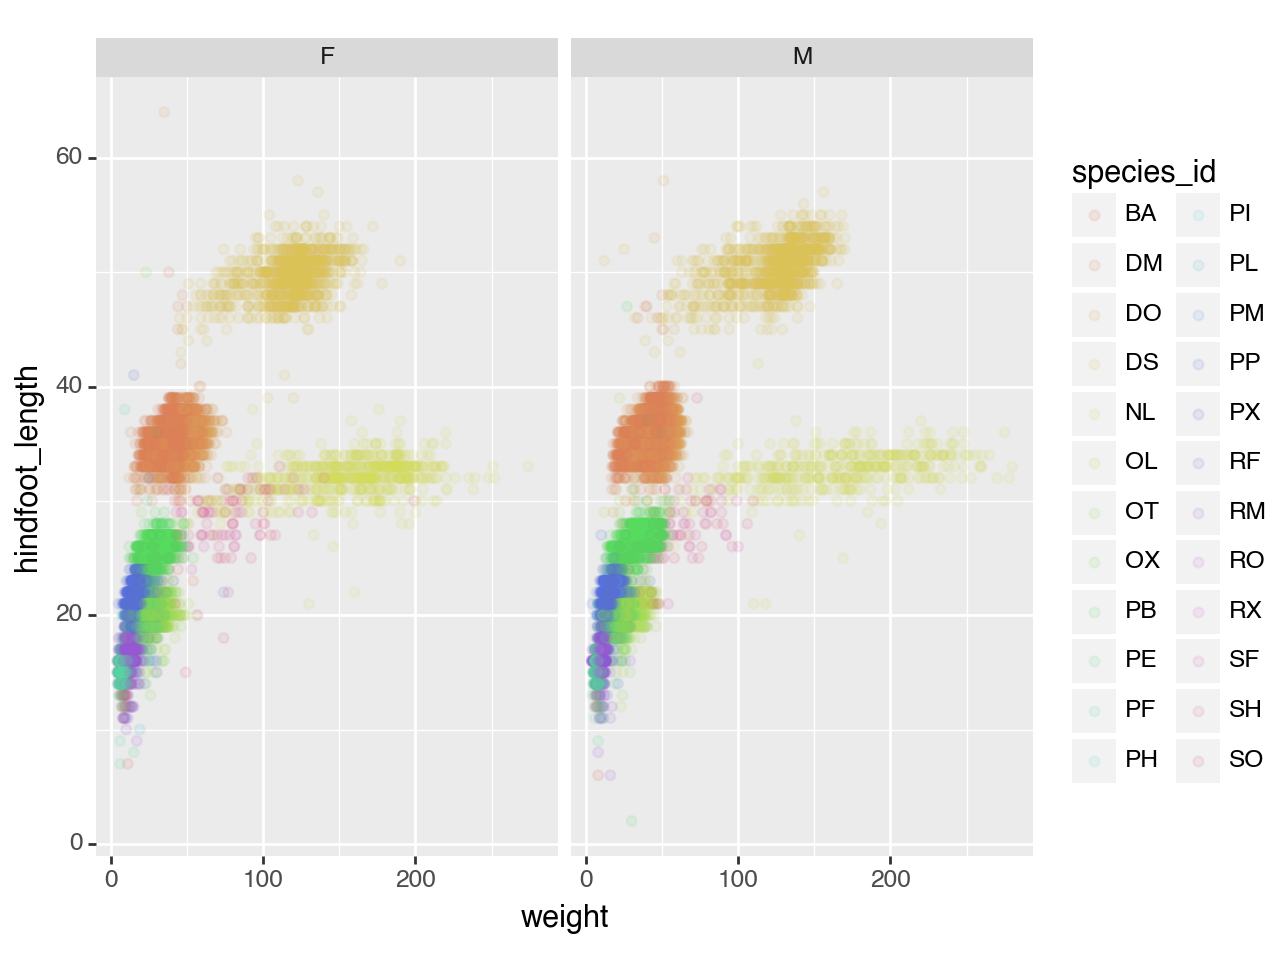

<Figure Size: (640 x 480)>

In [22]:
# facet_wrap by "sex"
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("sex")
)

We can apply the same concept on any of the available categorical variables:

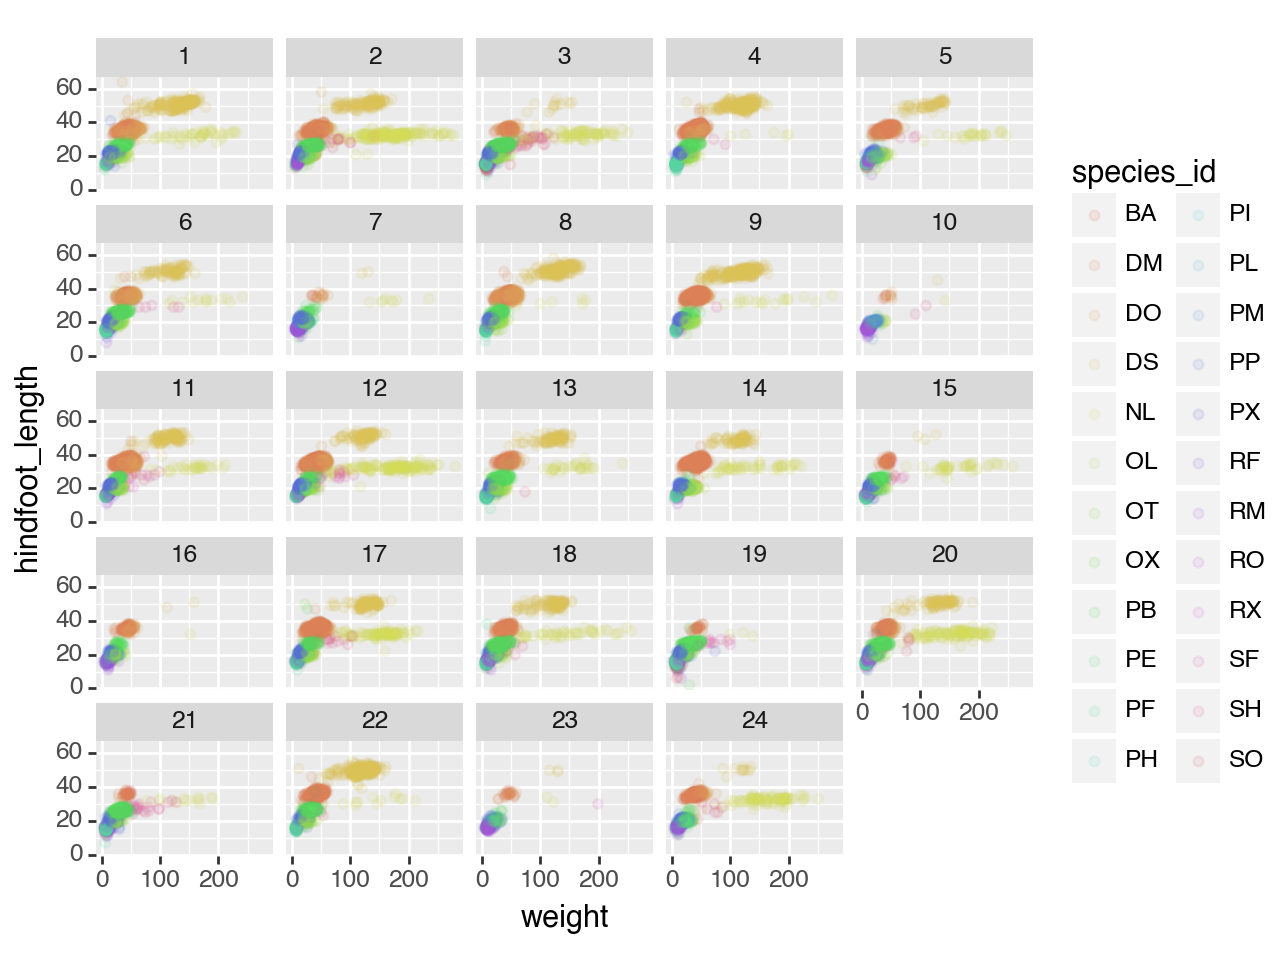

<Figure Size: (640 x 480)>

In [23]:
# facet_wrap by "plot_id"
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("plot_id")
)

The facet_wrap geometry extracts plots into an arbitrary number of dimensions to allow them to cleanly fit on one page. 

On the other hand, the facet_grid geometry allows you to explicitly specify how you want your plots to be arranged via formula notation (rows ~ columns; a . can be used as a placeholder that indicates only one row or column).

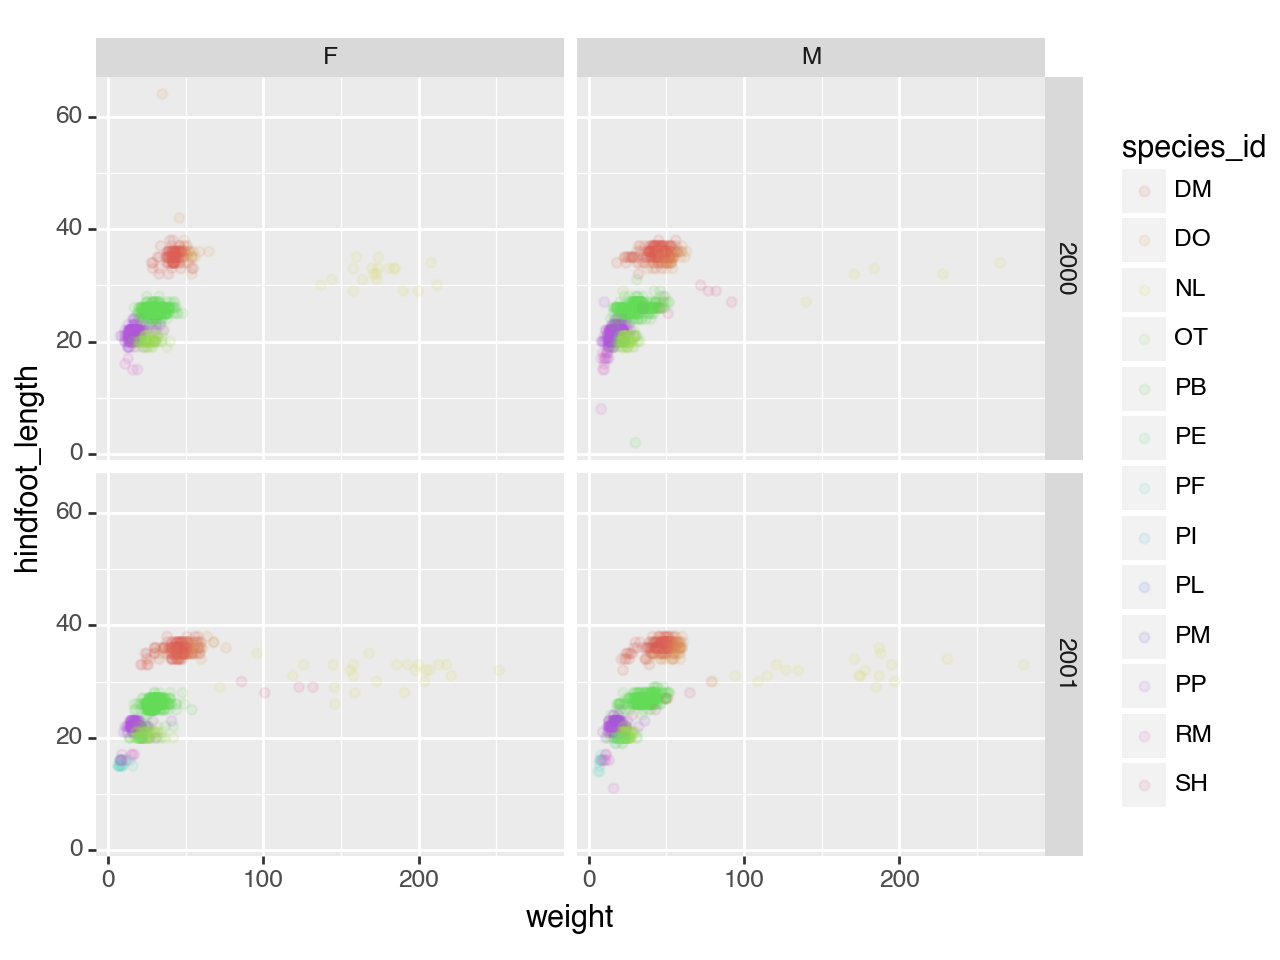

<Figure Size: (640 x 480)>

In [24]:
# Selecting years of interest
survey_2000 = surveys_complete[surveys_complete["year"].isin([2000, 2001])]

# Plotting with facet_grid()
(p9.ggplot(data=survey_2000,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_grid("year ~ sex")
)

## ✏️ Challenge - Distributions
1. Create a separate plot for each of the species that depicts how the average weight of the species changes through the years.
2. Based on the previous exercise, visually compare how the weights of male and females has changed through time by creating a separate plot for each sex and an individual color assigned to each species_id.

/Users/286329i/mambaforge/envs/cids-workshop/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


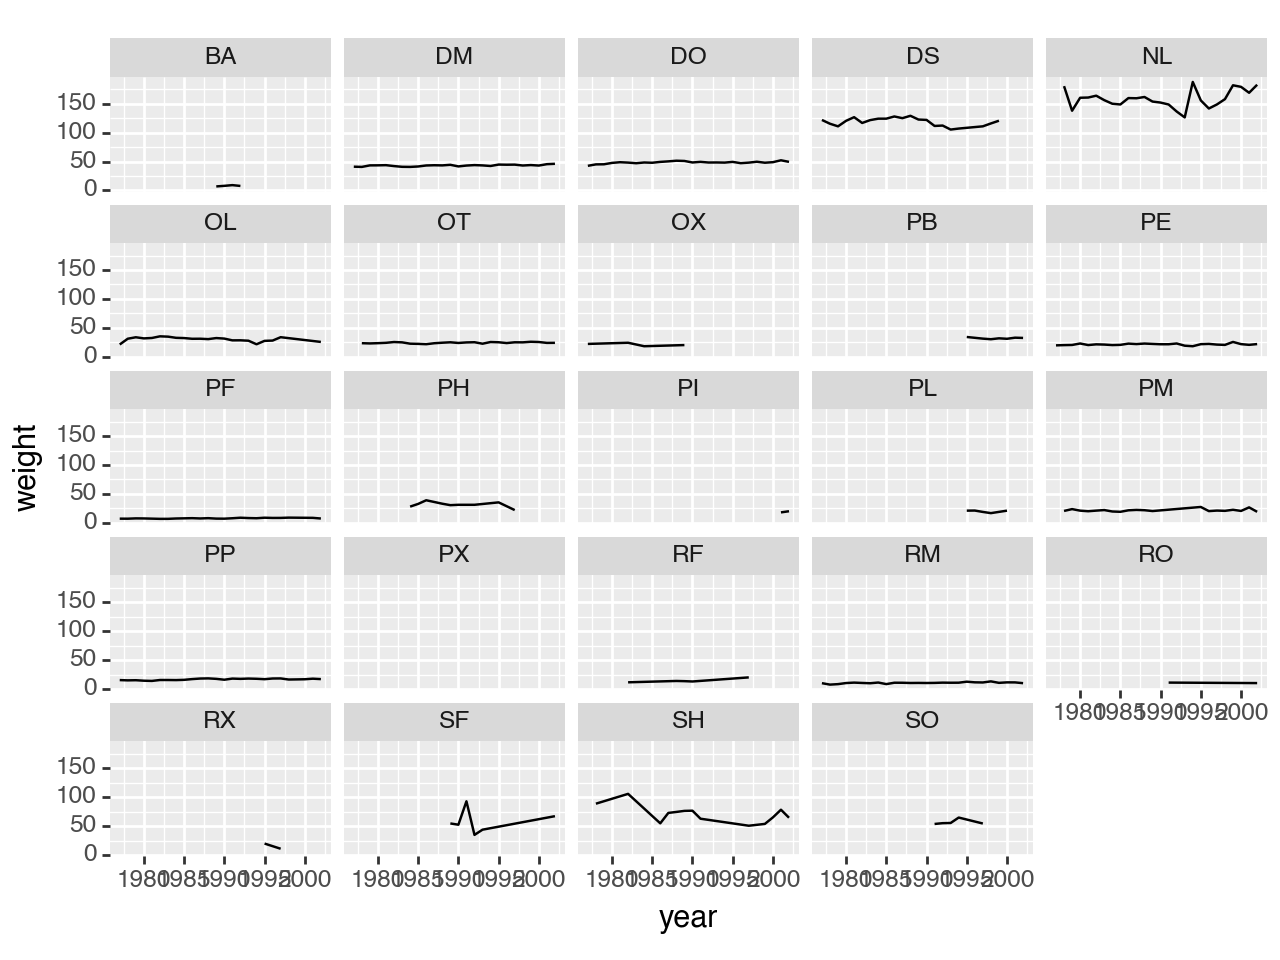

<Figure Size: (640 x 480)>

In [25]:
# 1
yearly_weight = surveys_complete.groupby(['year', 'species_id'])['weight'].mean().reset_index()
(p9.ggplot(data=yearly_weight, mapping=p9.aes(x='year', y='weight'))
    + p9.geom_line()
    + p9.facet_wrap("species_id")
)

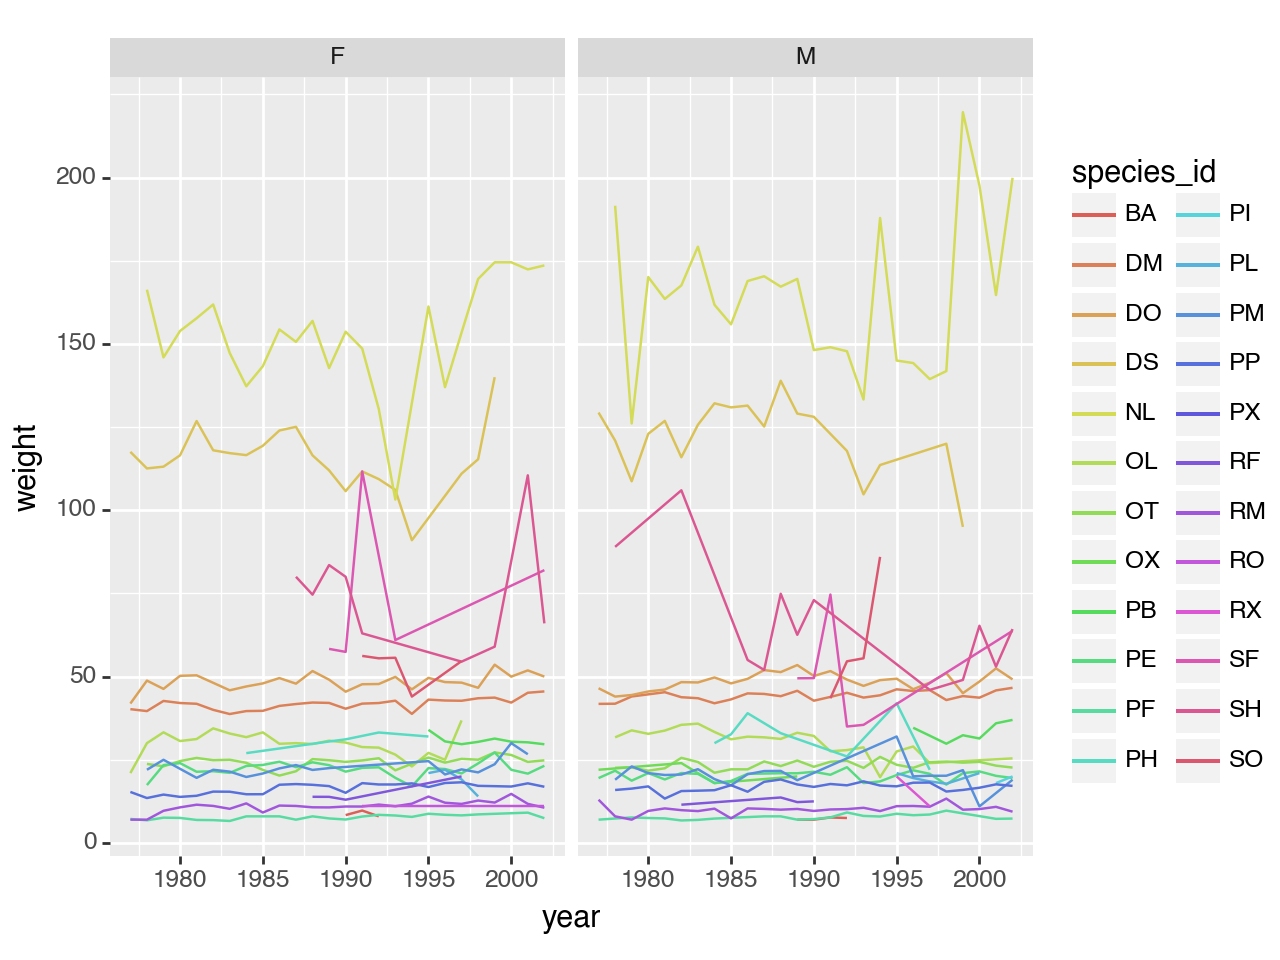

<Figure Size: (640 x 480)>

In [26]:
# 2
yearly_weight = surveys_complete.groupby(['year', 'species_id', 'sex'])['weight'].mean().reset_index()

(p9.ggplot(data=yearly_weight,
           mapping=p9.aes(x='year',
                          y='weight',
                          color='species_id'))
    + p9.geom_line()
    + p9.facet_wrap("sex")
)

---
## Further Customisation
As the syntax of plotnine follows the original R package ggplot2, the documentation of ggplot2 can provide information and inspiration to customize graphs. Take a look at the ggplot2 cheat sheet, and think of ways to improve the plot. 

The theming options provide a rich set of visual adaptations. Consider the following example of a bar plot with the counts per year.

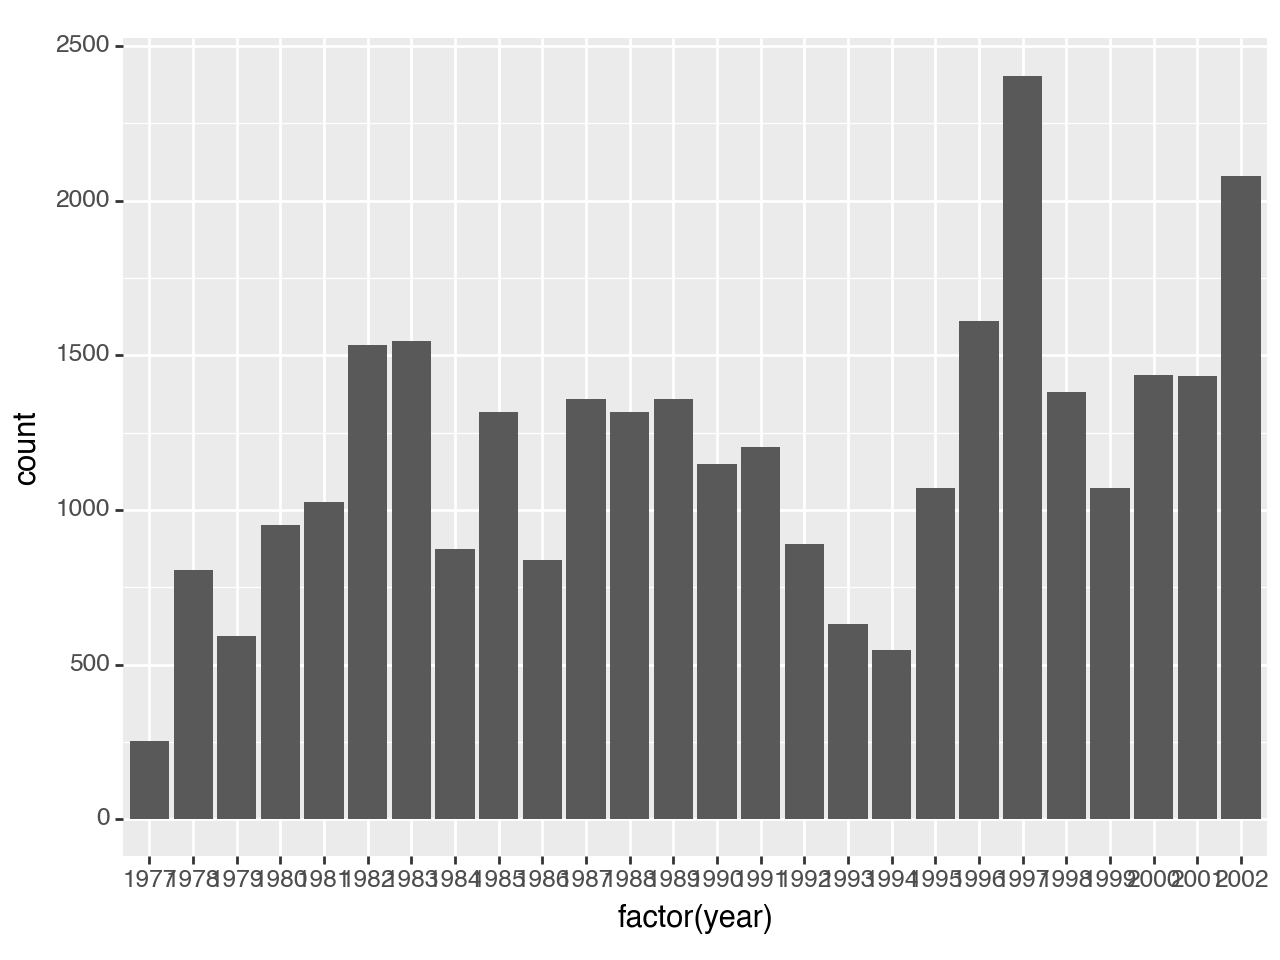

<Figure Size: (640 x 480)>

In [27]:
# Bar Plot of Counts per Year
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
)

Notice that we use the year here as a categorical variable by using the factor functionality. However, by doing so, we have the individual year labels overlapping with each other. The theme functionality provides a way to rotate the text of the x-axis labels:

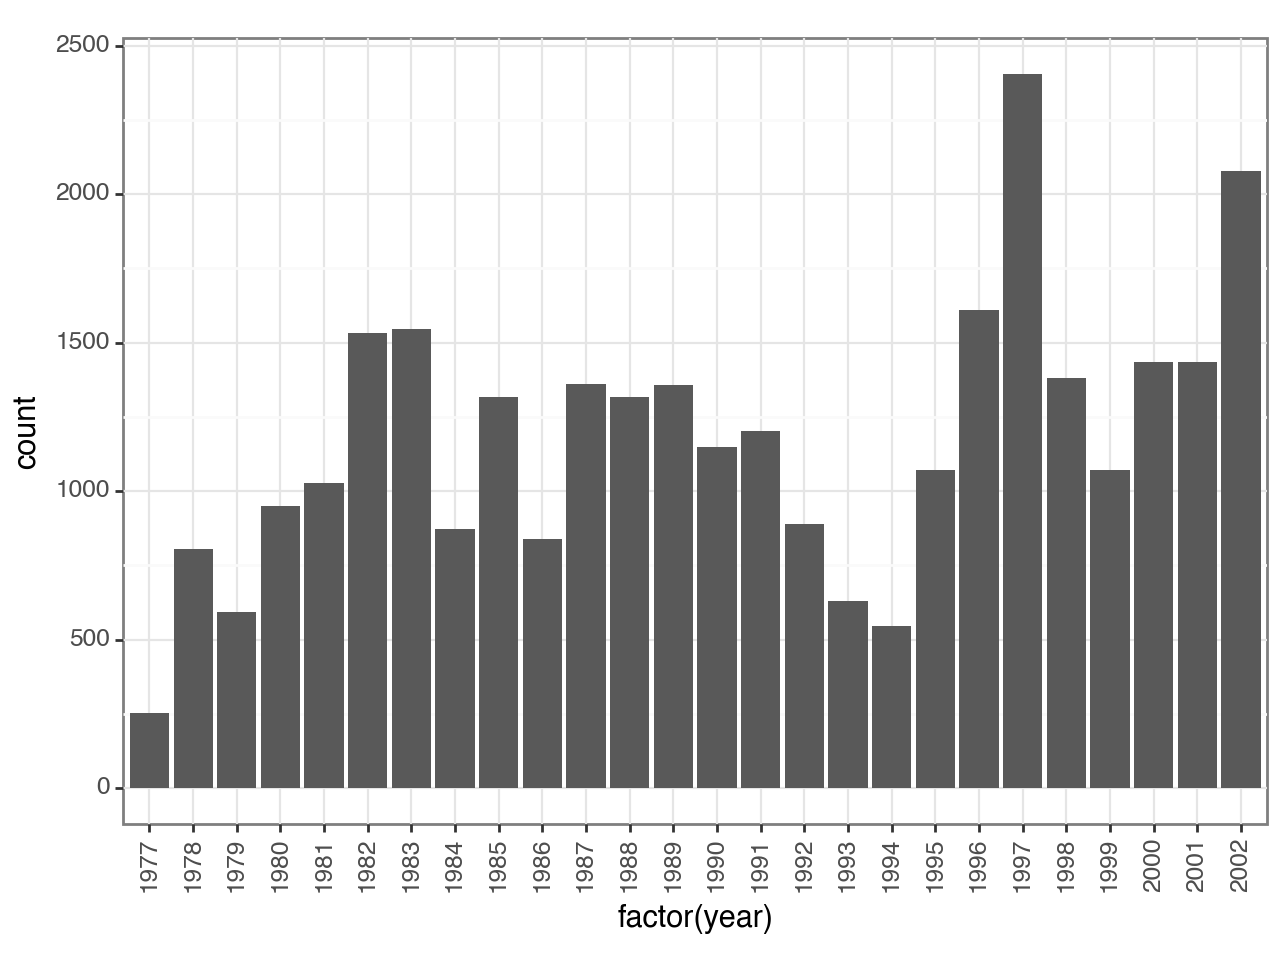

<Figure Size: (640 x 480)>

In [28]:
# Rotating the x-axis labels
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

When you like a specific set of theme-customizations you created, you can save them as an object to easily apply them to other plots you may create:

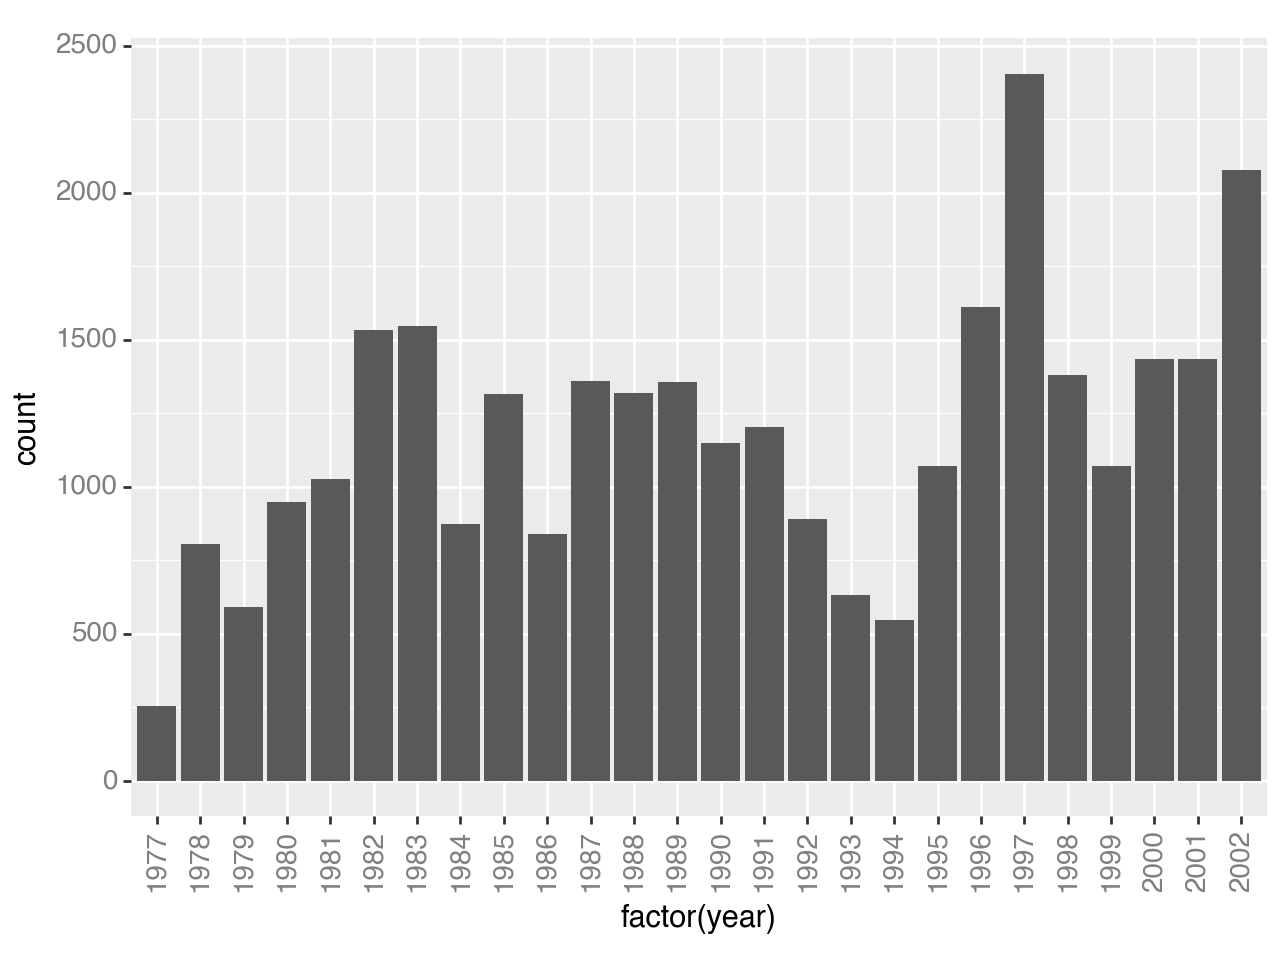

<Figure Size: (640 x 480)>

In [29]:
# Defining a custom theme
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="grey", size=10,
                                                         angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="grey", size=10))

# Adding the theme to the plot
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + my_custom_theme
)

---
## Exporting Plots
After creating your plot, you can save it to a file in your favourite format. You can easily change the dimension (and its resolution) of your plot by adjusting the appropriate arguments (width, height and dpi):

In [30]:
# Exporting a plot to a file
my_plot = (p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)

# Export to a file named scatterplot.png
my_plot.save("scatterplot.png", width=10, height=10, dpi=300)

/Users/286329i/mambaforge/envs/cids-workshop/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 10 x 10 in image.
/Users/286329i/mambaforge/envs/cids-workshop/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: scatterplot.png


# ❗Key Points from this notebook

- The data, aes variables and a geometry are the main elements of a plotnine graph

- With the + operator, additional scale_*, theme_*, xlab/ylab and facet_* elements are added


# ❗Key Points from all of today

-  Python is an interpreted language which can be used interactively or in scripting mode (executing a series of commands saved in file).

- One can assign a value to a variable in Python. Those variables can be of several types, such as string, integer, floating point and complex numbers.
- Lists and tuples are similar in that they are ordered lists of elements; they differ in that a tuple is immutable (cannot be changed).

- Dictionaries are data structures that provide mappings between keys and values.

- Libraries enable us to extend the functionality of Python.

- Pandas is a popular library for working with data.
- A Dataframe is a Pandas data structure that allows one to access data by column (name or index) or row.

- Aggregating data using the groupby() function enables you to generate useful summaries of data quickly.

- Plots can be created from DataFrames or subsets of data that have been generated with groupby().

- In Python, portions of data can be accessed using indices, slices, column headings, and condition-based subsetting.

- Python uses 0-based indexing, in which the first element in a list, tuple or any other data structure has an index of 0.

- Pandas enables common data exploration steps such as data indexing, slicing and conditional subsetting.

- Pandas uses other names for data types than Python, for example: object for textual data.

- A column in a DataFrame can only have one data type.

- The data type in a DataFrame’s single column can be checked using dtype.

- Make conscious decisions about how to manage missing data.

- A DataFrame can be saved to a CSV file using the to_csv function.

- Pandas’ `merge` and `concat` can be used to combine subsets of a DataFrame, or even data from different files.

- `join` function combines DataFrames based on index or column.

- Joining two DataFrames can be done in multiple ways (left, right, and inner) depending on what data must be in the final DataFrame.

- `to_csv` can be used to write out DataFrames in CSV format.

- Loops are 🔥
 
- Functions are 💯

- plotnine is pretty!


## 🥷 Sneaky section: Answers
Answers to all of the notebooks can be found at the carpentries website:
https://datacarpentry.org/python-ecology-lesson/index.html